In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from utils import (visualize_p_value_adj, dotplots_and_ranking_most_significant_genes,
    visualize_rank_genes_groups_violin, visualize_venn_diagram_ttest_vs_wilcoxon)
import os

RANDOM_STATE = 42

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
adata = sc.read('transcriptomic')

c:\Users\giuli\anaconda3\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



In [3]:
adata.var_names_make_unique()

c:\Users\giuli\anaconda3\lib\site-packages\anndata\utils.py:260: UserWarning:

Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['TBCE-1']



In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [5]:
adata_CSF_MS = adata[(adata.obs['cell_type'] == 'CSF') & (adata.obs['MS/HC'] == 'MS')]
adata_PBMC_MS = adata[(adata.obs['cell_type'] == 'PBMC') & (adata.obs['MS/HC'] == 'MS')]

adata_CSF_HC = adata[(adata.obs['cell_type'] == 'CSF') & (adata.obs['MS/HC'] == 'HC')]
adata_PBMC_HC = adata[(adata.obs['cell_type'] == 'PBMC') & (adata.obs['MS/HC'] == 'HC')]

In [6]:
cells_not_expressed = ['Megakaryocytes/platelets', 'Megakaryocyte precursor',
    'Double-positive thymocytes', 'Cycling cells', 'Mast cells', 'Double-negative thymocytes',
    'Epithelial cells', 'B-cell lineage', 'MN', 'ETP', 'MNP', 'Macrophages']

In [7]:
adata_PBMC_MS = adata_PBMC_MS[~adata_PBMC_MS.obs['cell_types_labels'].isin(cells_not_expressed + ['pDC'])]
adata_PBMC_HC = adata_PBMC_HC[~adata_PBMC_HC.obs['cell_types_labels'].isin(cells_not_expressed + ['pDC'])]

In [8]:
adata_CSF_MS = adata_CSF_MS[~adata_CSF_MS.obs['cell_types_labels'].isin(cells_not_expressed + ['pDC'])]
adata_CSF_HC = adata_CSF_HC[~adata_CSF_HC.obs['cell_types_labels'].isin(cells_not_expressed + ['pDC'])]

In [9]:
cell_labels_counts_df = pd.DataFrame(index=adata_PBMC_MS.obs['cell_types_labels'].unique(),
    data=adata_PBMC_MS.obs['cell_types_labels'].value_counts().T)
cell_labels_counts_df.columns = ['PBMC_MS']
cell_labels_counts_df['PBMC_HC'] = adata_PBMC_HC.obs['cell_types_labels'].value_counts()
cell_labels_counts_df['CSF_MS'] = adata_CSF_MS.obs['cell_types_labels'].value_counts()
cell_labels_counts_df['CSF_HC'] = adata_CSF_HC.obs['cell_types_labels'].value_counts()

cell_labels_counts_df

PBMC_MS  PBMC_HC  CSF_MS  CSF_HC
T cells         84479    48474   31911   28825
B cells         16866     7020    2905    6088
ILC             10672     3104     889     471
Monocytes        2003     2710     579    1357
Plasma cells      809      570     172     461
HSC/MPP            81       14       2      24
DC                187       38      15      29

In [10]:
cell_types = adata_PBMC_MS.obs['cell_types_labels'].unique()
cell_types

['T cells', 'B cells', 'ILC', 'Monocytes', 'Plasma cells', 'HSC/MPP', 'DC']
Categories (7, object): ['B cells', 'DC', 'HSC/MPP', 'ILC', 'Monocytes', 'Plasma cells', 'T cells']

In [11]:
cell_labels_counts_df.plot(kind='bar', figsize=(10, 5), title='Cell types counts', logy=True);

## Rank genes groups

In [12]:
def compute_rank_genes_group(adata_cell_type, methods=['t-test', 'wilcoxon']):
    # compare each group to the union of the rest of the groups, so MS vs HC
    sc.tl.rank_genes_groups(adata_cell_type, 'MS/HC', random_state=RANDOM_STATE)

    for metohd in methods:
        print(f'Computing rank_genes_groups for {metohd}')
        sc.tl.rank_genes_groups(adata_cell_type, 'MS/HC', method=metohd, key_added=metohd, random_state=RANDOM_STATE)

    return adata_cell_type

### T cells

In [13]:
if os.path.exists('write/T_cells.h5ad'):
    adata_T_cells = sc.read('write/T_cells.h5ad')
else:
    adata_T_cells = adata[adata.obs['cell_types_labels']=='T cells']
    adata_T_cells = compute_rank_genes_group(adata_T_cells)
    adata_T_cells.write('write/T_cells.h5ad')

In [14]:
adata_T_cells

AnnData object with n_obs × n_vars = 193689 × 37944
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC'
    var: 'gene_ids', 'feature_types'
    uns: 'log1p', 'rank_genes_groups', 't-test', 'wilcoxon'

In [15]:
visualize_venn_diagram_ttest_vs_wilcoxon(adata_T_cells, cell_type_name='T cells')

All write reported below are for the t-test.

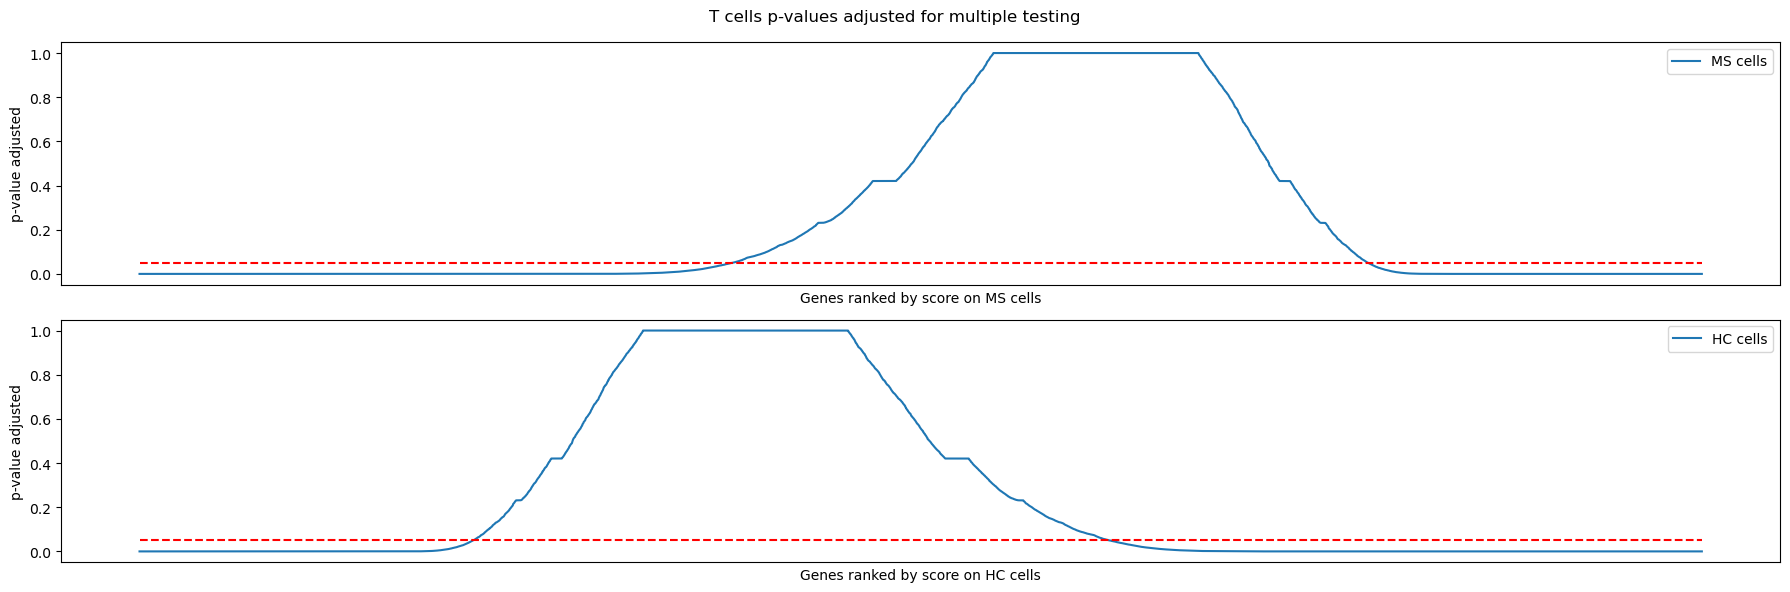

In [16]:
visualize_p_value_adj(adata_T_cells, cell_type_name='T cells')

In [17]:
dotplots_and_ranking_most_significant_genes(adata_T_cells, cell_type_name='T cells')

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator



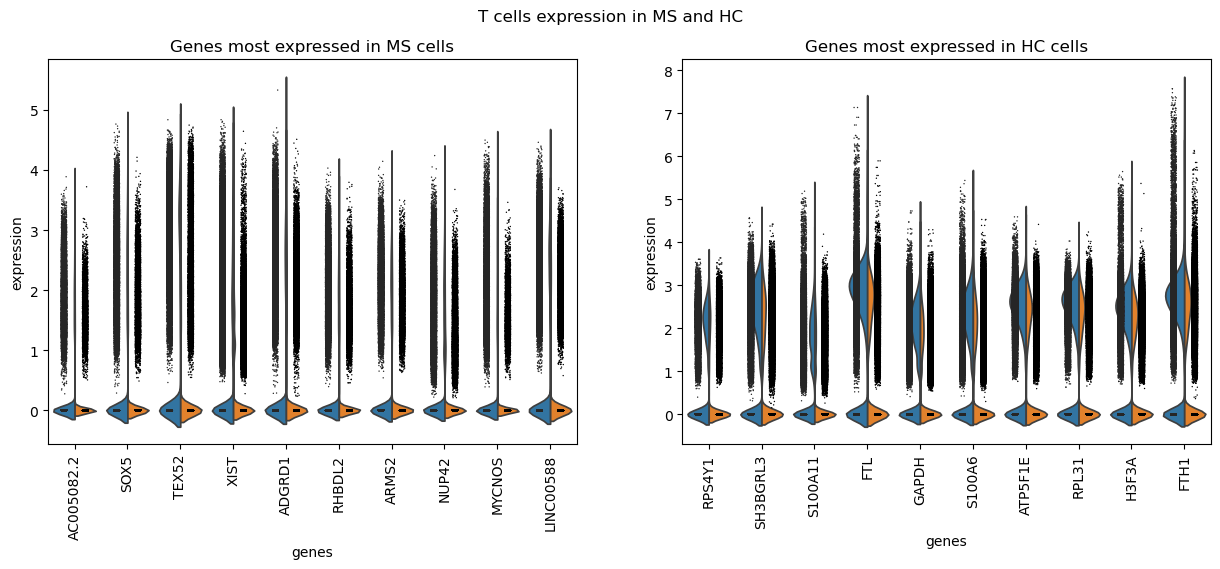

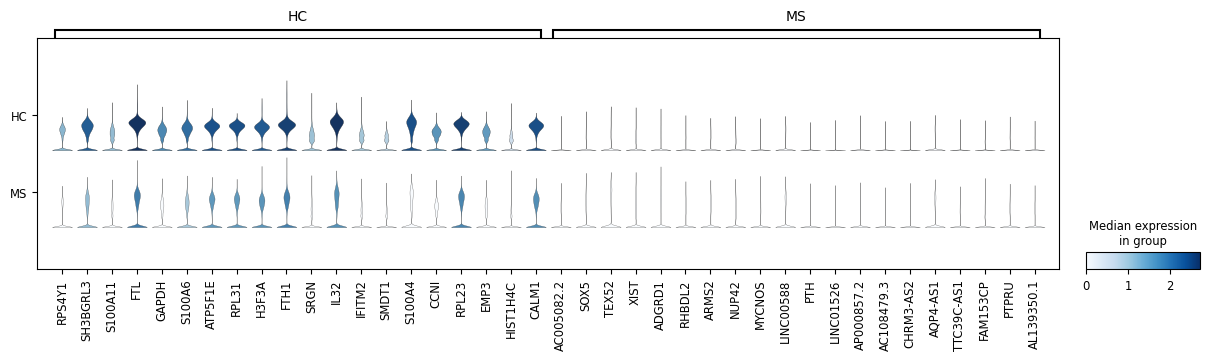

In [18]:
visualize_rank_genes_groups_violin(adata_T_cells, cell_type_name='T cells')

In [19]:
sc.get.rank_genes_groups_df(adata_T_cells, group='HC', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names      scores  logfoldchanges     pvals  pvals_adj
0         RPS4Y1  120.511803        1.558697  0.000000   0.000000
1       SH3BGRL3  110.806778        1.168206  0.000000   0.000000
2        S100A11  108.777298        1.276080  0.000000   0.000000
3            FTL  107.570656        1.174066  0.000000   0.000000
4          GAPDH  105.828438        1.080340  0.000000   0.000000
...          ...         ...             ...       ...        ...
7478        EYA3    2.783531        0.096851  0.005378   0.009923
7479       IGHG1    2.782976        0.246006  0.005387   0.009938
7480        KPTN    2.782849        0.222104  0.005389   0.009942
7481  AL137856.1    2.782001        0.375561  0.005403   0.009966
7482        THY1    2.781543        1.047802  0.005411   0.009980

[7483 rows x 5 columns]

In [20]:
sum(adata_T_cells.uns['t-test']['pvals_adj']['HC'] < 0.01) / len(adata_T_cells.uns['t-test']['pvals_adj']['HC'])

0.5421937592241197

In [21]:
sc.get.rank_genes_groups_df(adata_T_cells, group='MS', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names     scores  logfoldchanges     pvals  pvals_adj
0      AC005082.2  87.930656        1.865121  0.000000   0.000000
1            SOX5  87.851883        1.614402  0.000000   0.000000
2           TEX52  86.284286        1.516038  0.000000   0.000000
3            XIST  78.651466        1.104501  0.000000   0.000000
4          ADGRD1  75.826370        1.326092  0.000000   0.000000
...           ...        ...             ...       ...        ...
13085  AC098850.2   2.783295       16.622858  0.005382   0.009929
13086  AL033523.1   2.783275        0.579039  0.005382   0.009929
13087       EFHD1   2.782745        0.484409  0.005391   0.009944
13088    PAN3-AS1   2.782251        0.290426  0.005399   0.009959
13089      AMOTL2   2.781008        1.378467  0.005420   0.009996

[13090 rows x 5 columns]

In [22]:
sum(adata_T_cells.uns['t-test']['pvals_adj']['MS'] < 0.01) / len(adata_T_cells.uns['t-test']['pvals_adj']['MS'])

0.5421937592241197

### B cells

In [23]:
if os.path.exists('write/B_cells.h5ad'):
    adata_B_cells = sc.read('write/B_cells.h5ad')
else:
    adata_B_cells = adata[adata.obs['cell_types_labels']=='B cells']
    adata_B_cells = compute_rank_genes_group(adata_B_cells)
    adata_B_cells.write('write/B_cells.h5ad')
adata_B_cells

AnnData object with n_obs × n_vars = 32879 × 37944
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC'
    var: 'gene_ids', 'feature_types'
    uns: 'log1p', 'rank_genes_groups', 't-test', 'wilcoxon'

In [24]:
visualize_venn_diagram_ttest_vs_wilcoxon(adata_B_cells, cell_type_name='B cells')

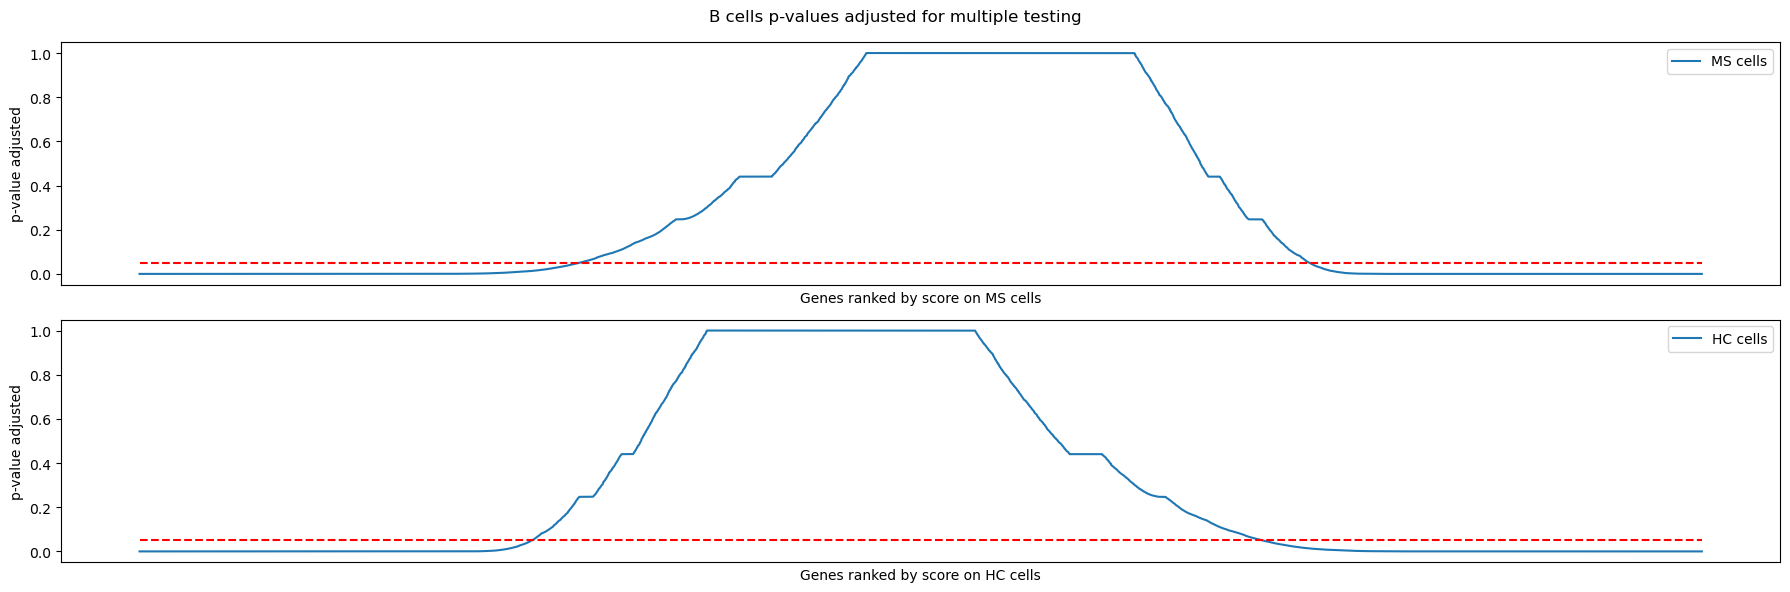

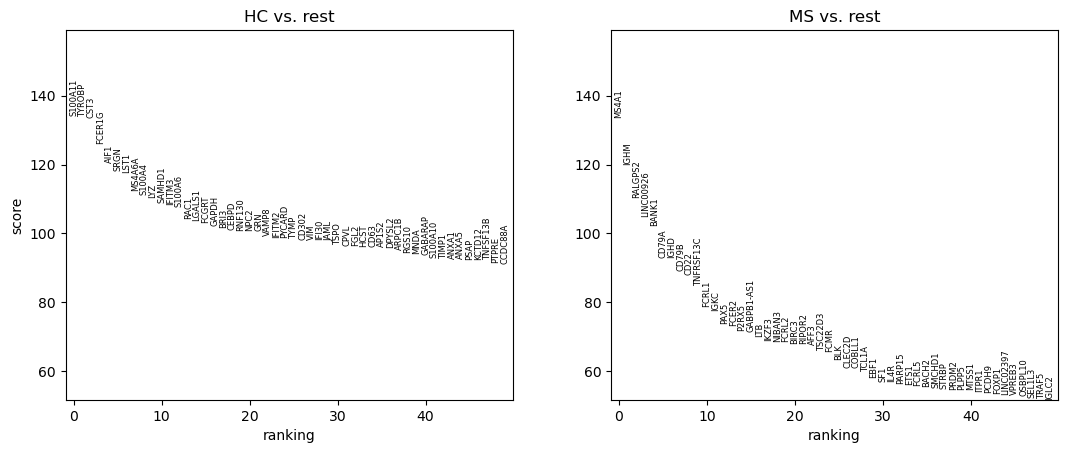

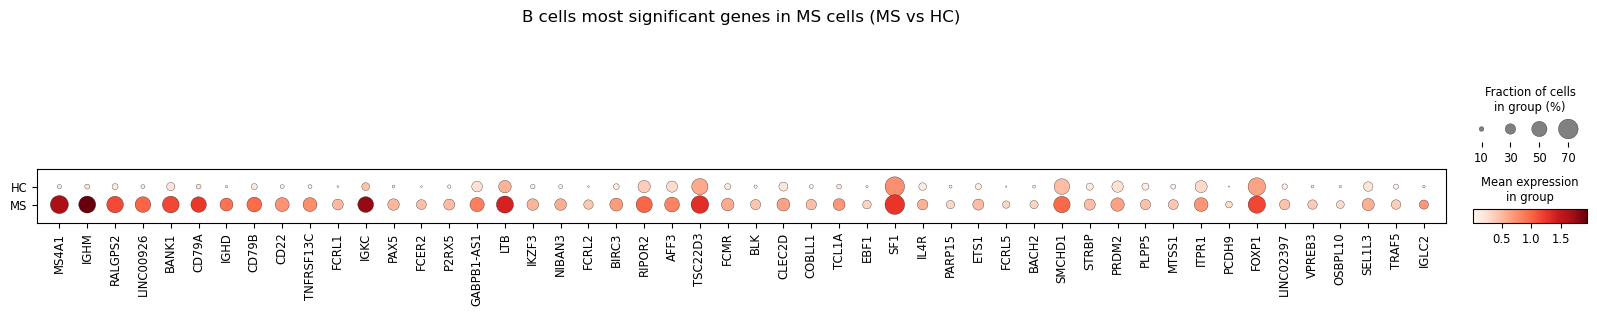

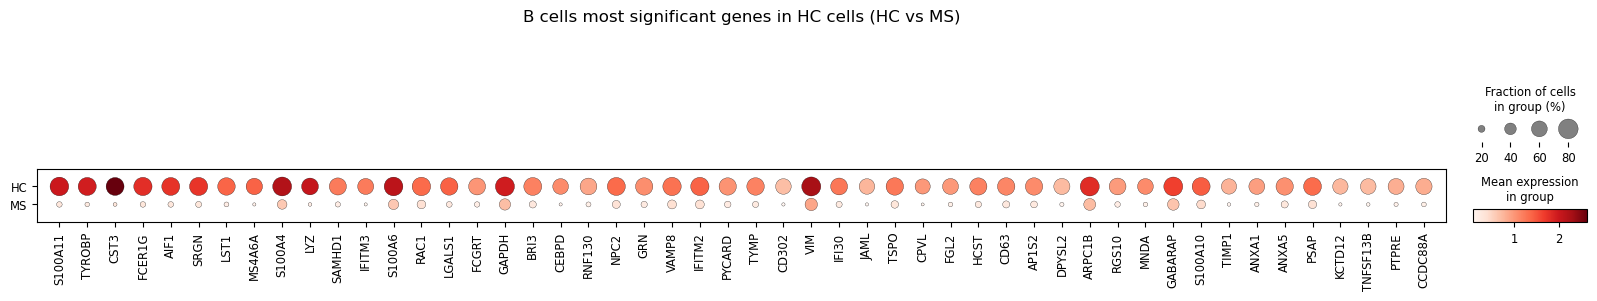

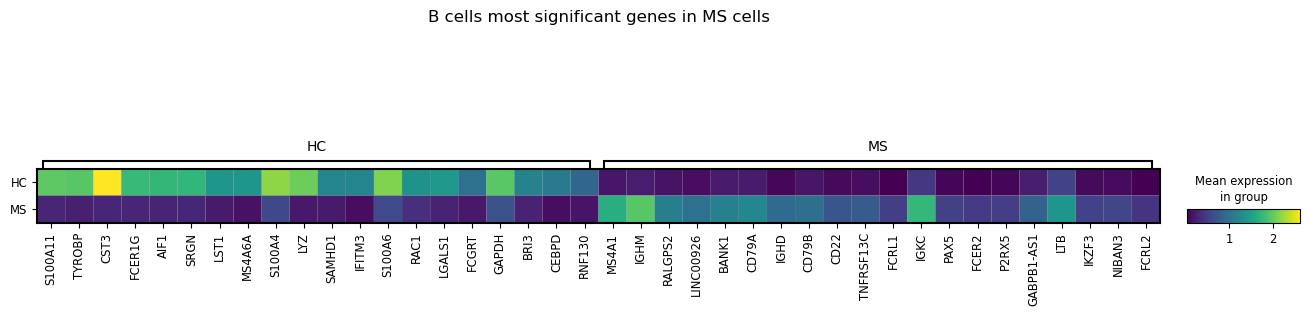

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator



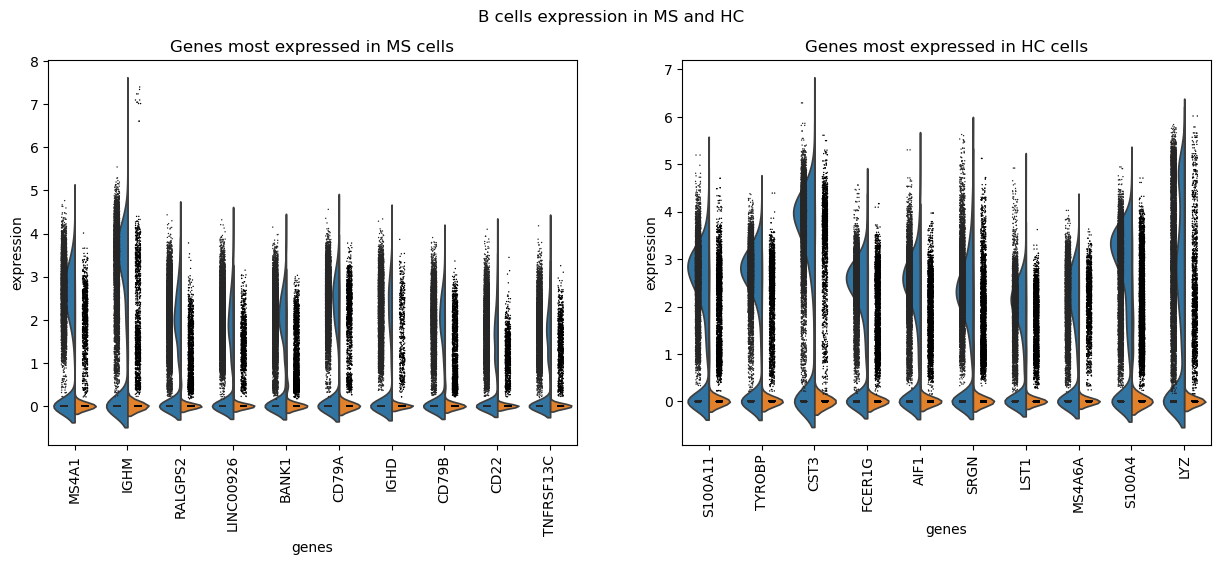

In [25]:
visualize_p_value_adj(adata_B_cells, cell_type_name='B cells')
dotplots_and_ranking_most_significant_genes(adata_B_cells, cell_type_name='B cells')
visualize_rank_genes_groups_violin(adata_B_cells, cell_type_name='B cells')

In [26]:
sc.get.rank_genes_groups_df(adata_B_cells, group='HC', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names      scores  logfoldchanges     pvals  pvals_adj
0        S100A11  134.236115        4.181875  0.000000   0.000000
1         TYROBP  133.922119        4.367086  0.000000   0.000000
2           CST3  133.451965        5.141423  0.000000   0.000000
3         FCER1G  125.978165        3.827854  0.000000   0.000000
4           AIF1  120.533546        3.822677  0.000000   0.000000
...          ...         ...             ...       ...        ...
8878     TMEM220    2.823623        0.172737  0.004752   0.009927
8879  ZNF687-AS1    2.822841        0.525864  0.004763   0.009951
8880       FGFR3    2.822701       18.109348  0.004769   0.009962
8881        CRYM    2.822346        0.525754  0.004771   0.009965
8882       P4HTM    2.821840        0.183347  0.004778   0.009979

[8883 rows x 5 columns]

In [27]:
sc.get.rank_genes_groups_df(adata_B_cells, group='MS', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names      scores  logfoldchanges     pvals  pvals_adj
0          MS4A1  133.454468        4.454977  0.000000   0.000000
1           IGHM  119.852715        4.538815  0.000000   0.000000
2        RALGPS2  110.331375        3.674675  0.000000   0.000000
3      LINC00926  104.766418        3.827029  0.000000   0.000000
4          BANK1  102.280884        3.145742  0.000000   0.000000
...          ...         ...             ...       ...        ...
9279       STX1B    2.824408        0.556146  0.004740   0.009904
9280  AC010745.1    2.824009        0.758657  0.004746   0.009916
9281  CR936218.1    2.823730        1.216461  0.004750   0.009924
9282  AC002059.1    2.823620        1.316317  0.004752   0.009927
9283  AC025262.4    2.823576        0.782032  0.004752   0.009927

[9284 rows x 5 columns]

### ILC

In [28]:
if os.path.exists('write/ILC.h5ad'):
    adata_ILC = sc.read('write/ILC.h5ad')
else:
    adata_ILC = adata[adata.obs['cell_types_labels']=='ILC']
    adata_ILC = compute_rank_genes_group(adata_ILC)
    adata_ILC.write('write/ILC.h5ad')
adata_ILC

AnnData object with n_obs × n_vars = 15136 × 37944
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC'
    var: 'gene_ids', 'feature_types'
    uns: 'log1p', 'rank_genes_groups', 't-test', 'wilcoxon'

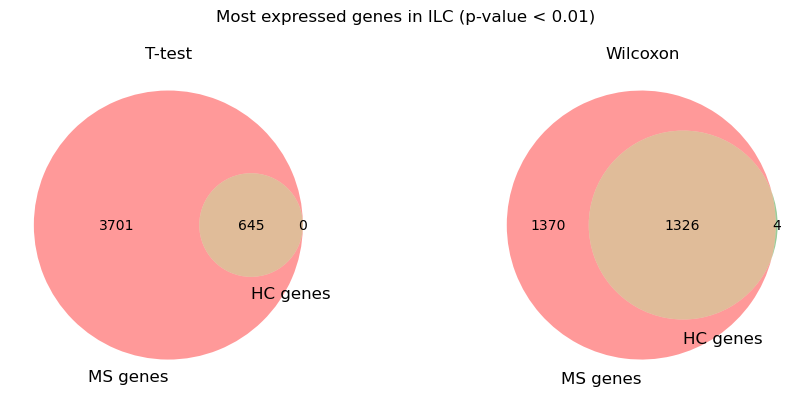

In [29]:
visualize_venn_diagram_ttest_vs_wilcoxon(adata_ILC, cell_type_name='ILC')

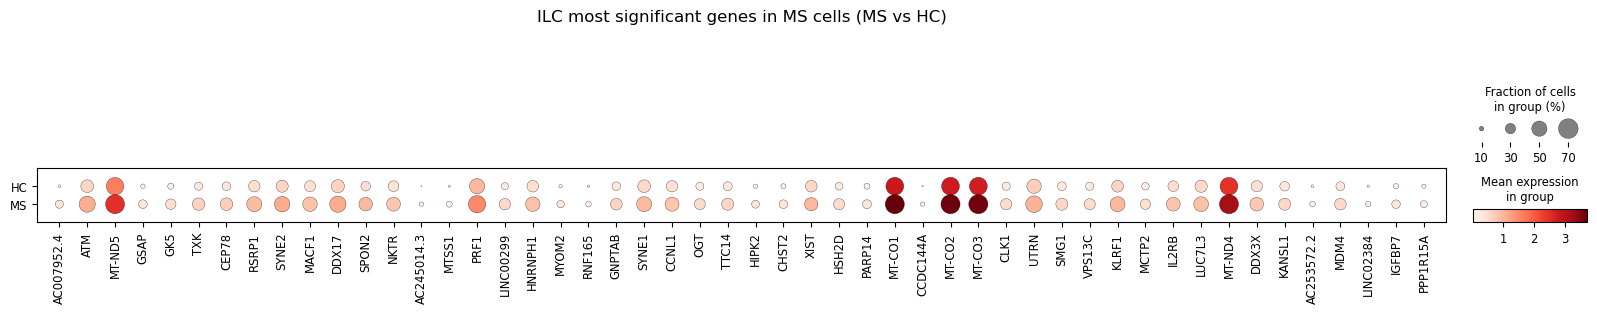

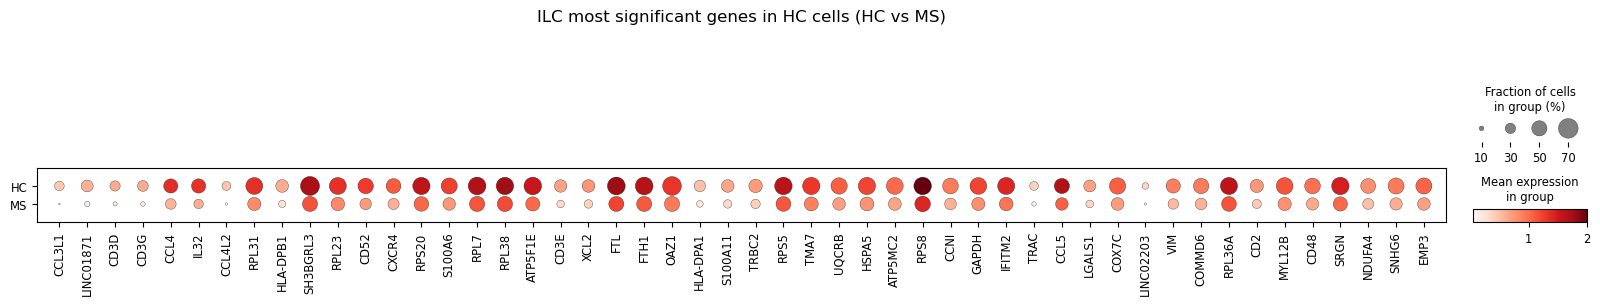

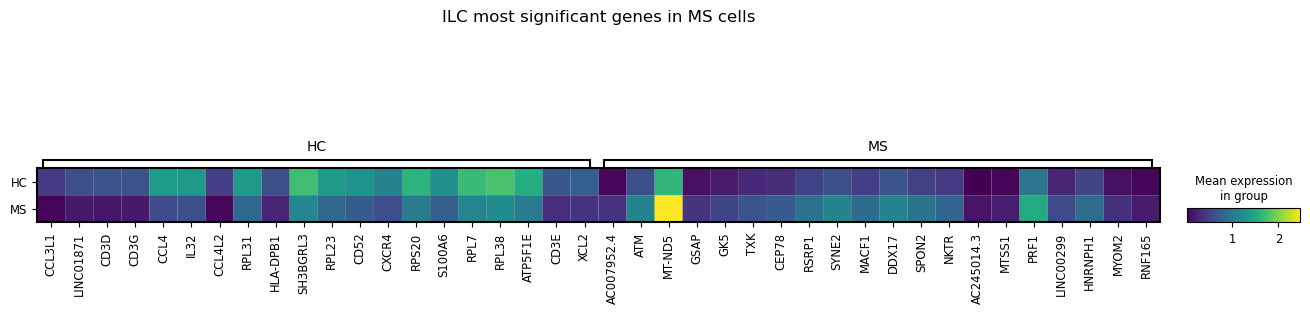

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator



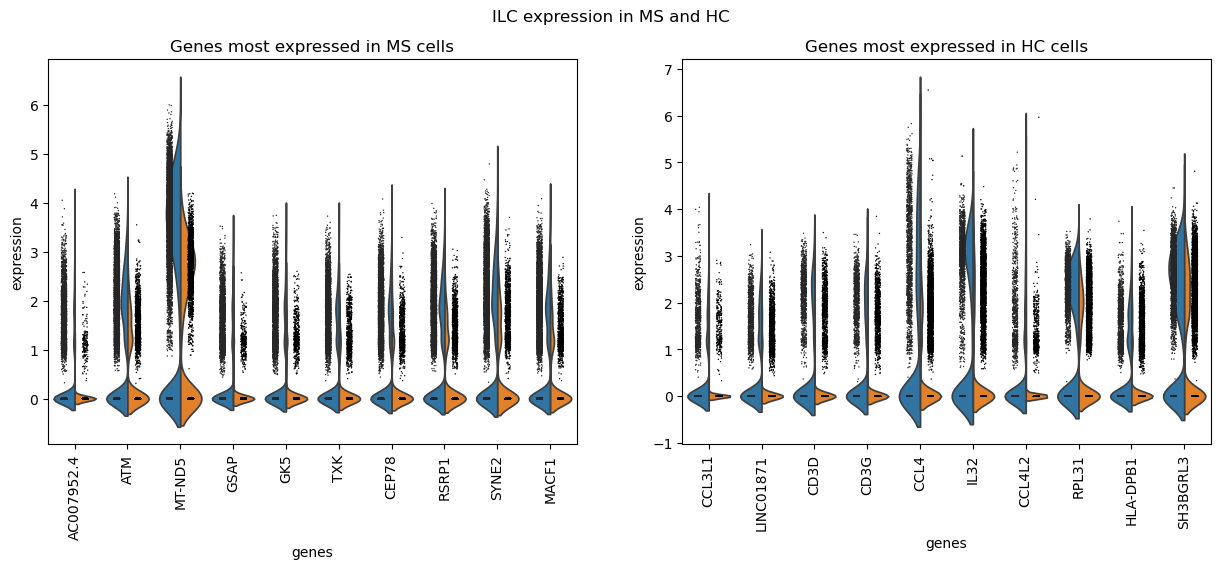

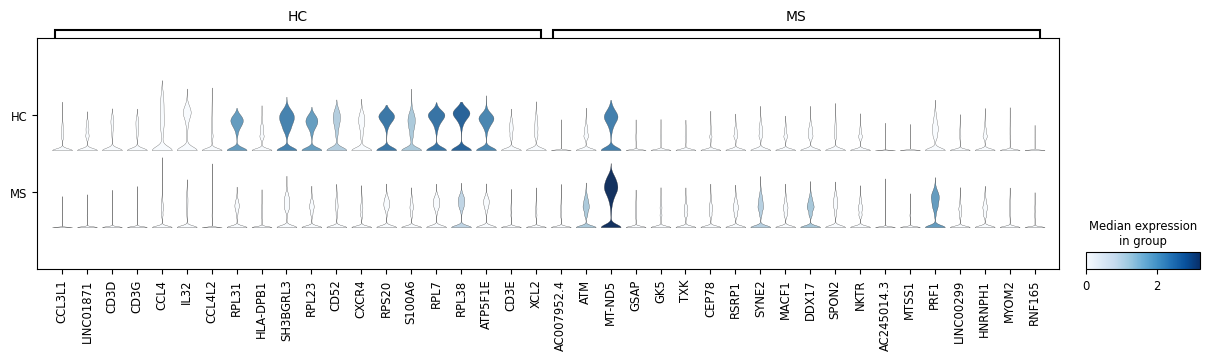

In [30]:
visualize_p_value_adj(adata_ILC, cell_type_name='ILC')
dotplots_and_ranking_most_significant_genes(adata_ILC, cell_type_name='ILC')
visualize_rank_genes_groups_violin(adata_ILC, cell_type_name='ILC')

In [31]:
sc.get.rank_genes_groups_df(adata_ILC, group='HC', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names     scores  logfoldchanges          pvals      pvals_adj
0        CCL3L1  30.215837        3.807110  5.898036e-180  7.459836e-176
1     LINC01871  27.812979        2.053595  8.444263e-157  2.912810e-153
2          CD3D  26.542488        2.380203  1.275581e-143  3.457190e-140
3          CD3G  26.452782        2.187336  5.648894e-143  1.260833e-139
4          CCL4  26.351080        1.866305  6.426235e-142  1.354650e-138
...         ...        ...             ...            ...            ...
2691       EGR3   3.118788        3.570229   1.829933e-03   9.882573e-03
2692     ZNF773   3.116214        0.616381   1.841626e-03   9.935822e-03
2693      CDYL2   3.114816        1.094843   1.851819e-03   9.983626e-03
2694       URM1   3.114437        0.267605   1.852065e-03   9.983626e-03
2695       UROS   3.114437        0.277502   1.851888e-03   9.983626e-03

[2696 rows x 5 columns]

In [32]:
sc.get.rank_genes_groups_df(adata_ILC, group='MS', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names     scores  logfoldchanges          pvals      pvals_adj
0     AC007952.4  36.651722        2.806786  1.489669e-281  5.652400e-277
1            ATM  30.015141        1.306442  4.948789e-188  9.388842e-184
2         MT-ND5  29.067587        1.412598  1.754745e-176  1.331641e-172
3           GSAP  28.837589        1.916320  6.391784e-177  6.063246e-173
4            GK5  28.413115        1.650876  3.336883e-171  2.110245e-167
...          ...        ...             ...            ...            ...
4341  AC011524.2   3.114451        0.402254   1.850634e-03   9.981586e-03
4342      XXYLT1   3.114202        0.644632   1.850974e-03   9.982003e-03
4343  AL157931.1   3.113917        0.383619   1.854018e-03   9.992103e-03
4344         TAZ   3.113806        0.283541   1.854164e-03   9.992103e-03
4345        MALL   3.113185       20.461596   1.855319e-03   9.996909e-03

[4346 rows x 5 columns]

### Monocytes

In [33]:
if os.path.exists('write/Monocytes.h5ad'):
    adata_Monocytes = sc.read('write/Monocytes.h5ad')
else:
    adata_Monocytes = adata[adata.obs['cell_types_labels']=='Monocytes']
    adata_Monocytes = compute_rank_genes_group(adata_Monocytes)
    adata_Monocytes.write('write/Monocytes.h5ad')
adata_Monocytes

AnnData object with n_obs × n_vars = 6649 × 37944
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC'
    var: 'gene_ids', 'feature_types'
    uns: 'log1p', 'rank_genes_groups', 't-test', 'wilcoxon'

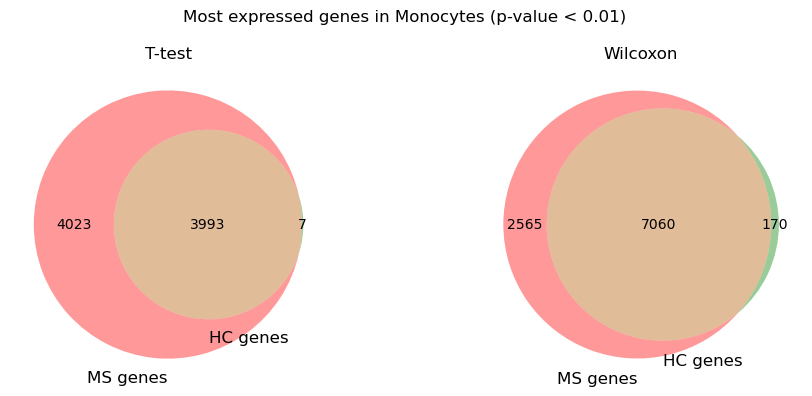

In [34]:
visualize_venn_diagram_ttest_vs_wilcoxon(adata_Monocytes, cell_type_name='Monocytes')

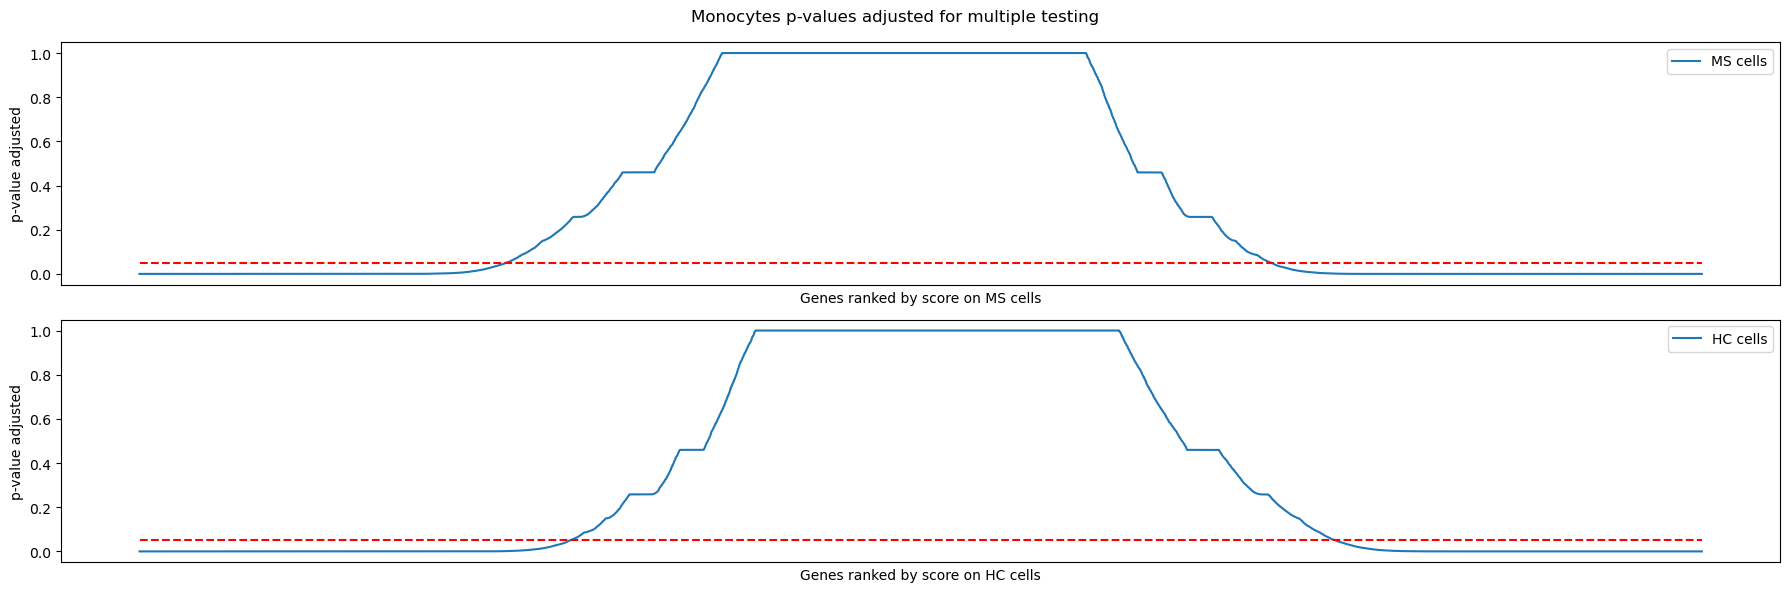

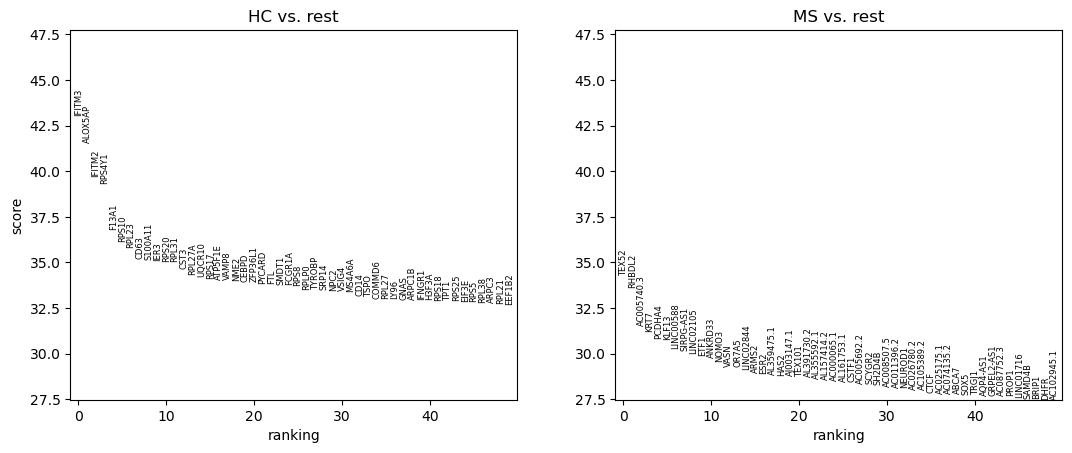

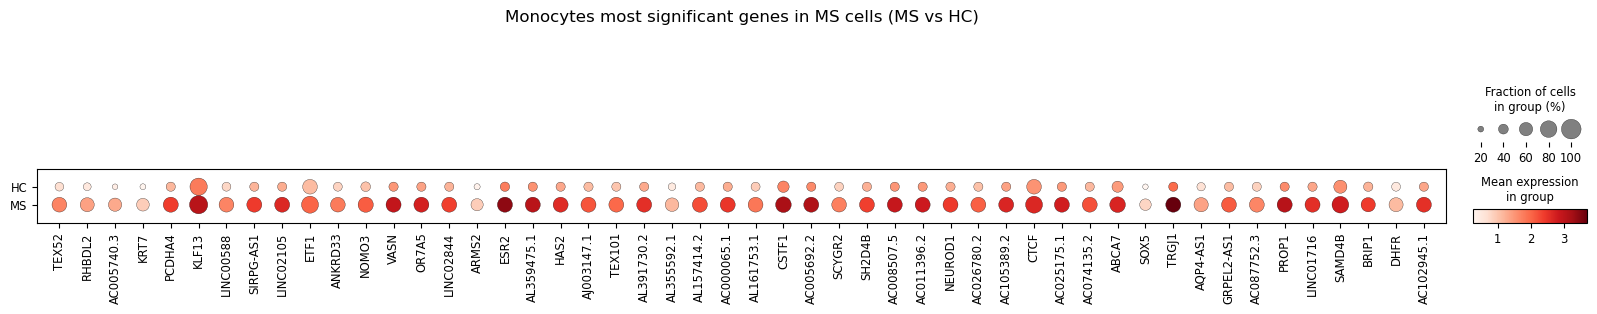

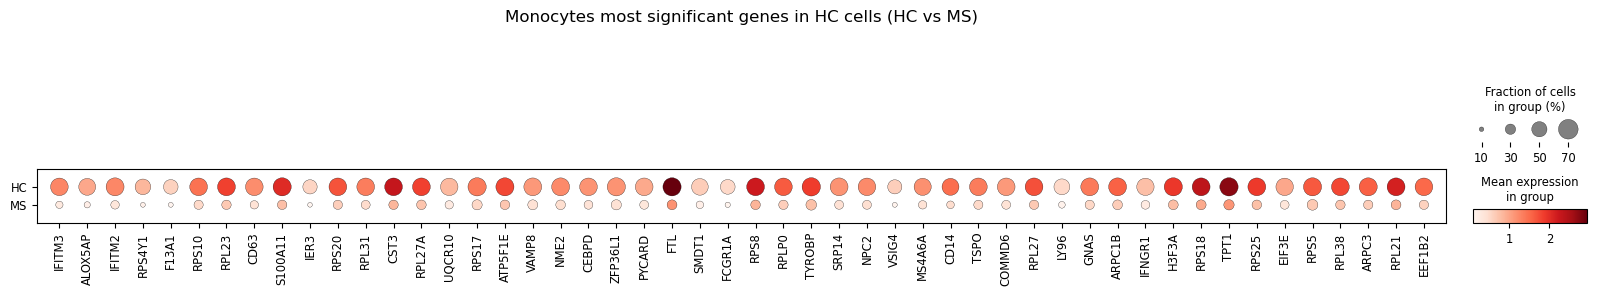

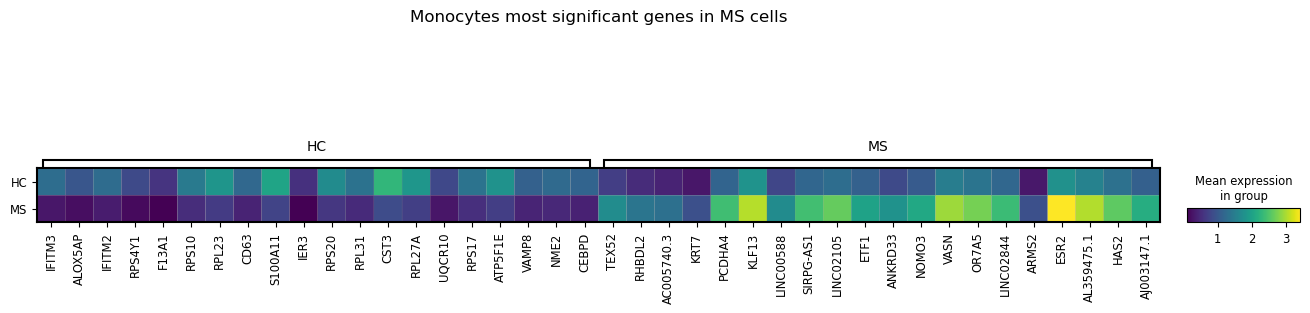

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator



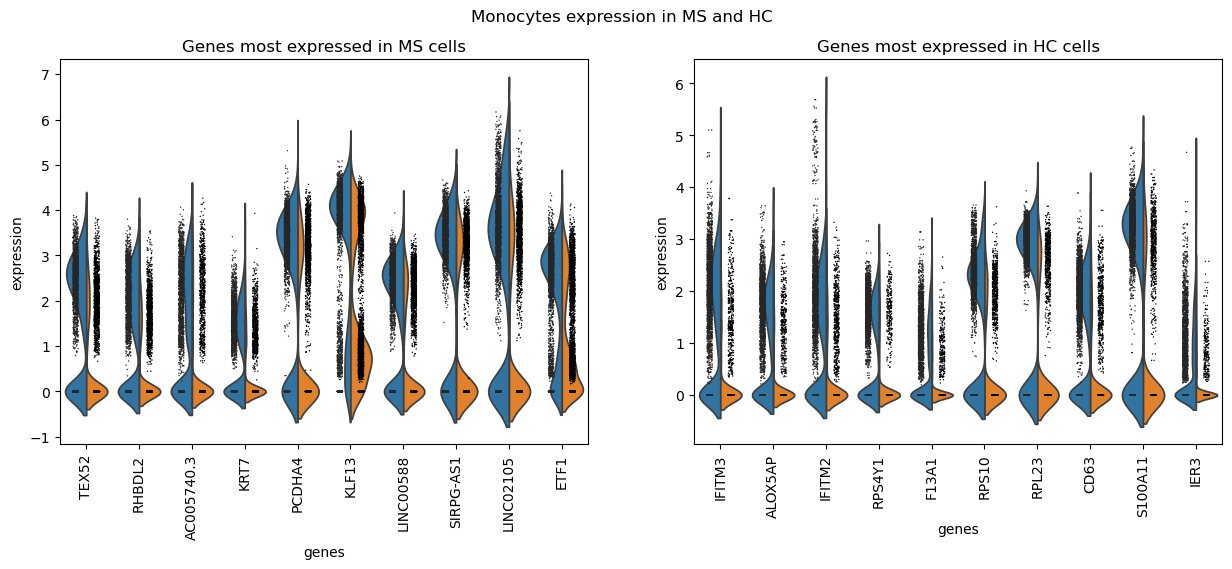

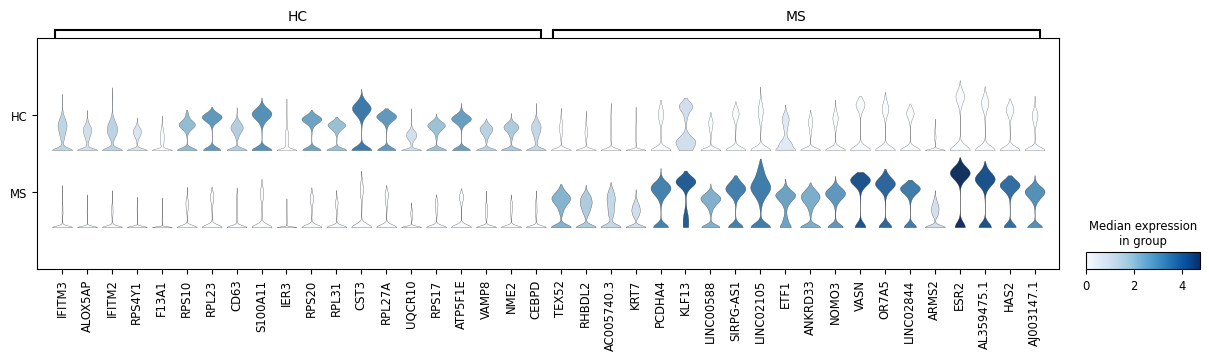

In [35]:
visualize_p_value_adj(adata_Monocytes, cell_type_name='Monocytes')
dotplots_and_ranking_most_significant_genes(adata_Monocytes, cell_type_name='Monocytes')
visualize_rank_genes_groups_violin(adata_Monocytes, cell_type_name='Monocytes')

In [36]:
sc.get.rank_genes_groups_df(adata_Monocytes, group='HC', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names     scores  logfoldchanges          pvals      pvals_adj
0         IFITM3  43.060951        2.911904   0.000000e+00   0.000000e+00
1        ALOX5AP  41.543480        2.795617   0.000000e+00   0.000000e+00
2         IFITM2  39.704933        2.598772  1.708606e-309  2.161045e-305
3         RPS4Y1  39.287746        2.796969  1.045793e-303  9.920393e-300
4          F13A1  36.791592        2.856008  4.708315e-268  3.573046e-264
...          ...        ...             ...            ...            ...
9620        GAB2   2.836267        0.350092   4.582156e-03   9.861343e-03
9621        ERI1   2.835264        0.461364   4.595489e-03   9.888355e-03
9622      ZNF446   2.835241        0.770119   4.593748e-03   9.885169e-03
9623  AL627171.2   2.833117        0.394007   4.627172e-03   9.953706e-03
9624  AC127024.4   2.832201        1.761295   4.636864e-03   9.973988e-03

[9625 rows x 5 columns]

In [37]:
sc.get.rank_genes_groups_df(adata_Monocytes, group='MS', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names     scores  logfoldchanges          pvals      pvals_adj
0          TEX52  34.276855        2.169634  3.891538e-230  5.906420e-227
1         RHBDL2  33.631363        2.176033  2.154184e-220  2.151010e-217
2     AC005740.3  31.511337        2.399306  1.159043e-196  2.542124e-194
3           KRT7  31.179764        2.137033  4.848889e-192  9.153545e-190
4         PCDHA4  30.814121        2.200338  4.826751e-192  9.153545e-190
...          ...        ...             ...            ...            ...
8011      SEMA3F   2.835025        1.148725   4.604054e-03   9.906222e-03
8012       KNDC1   2.834992        1.854184   4.611662e-03   9.921465e-03
8013      UNC13A   2.834466        1.005262   4.611022e-03   9.920652e-03
8014  AC091544.2   2.833484        0.921857   4.625985e-03   9.951717e-03
8015  AC087457.1   2.832333        1.601996   4.644592e-03   9.990046e-03

[8016 rows x 5 columns]

### Plasma cells

In [38]:
if os.path.exists('results/plasma_cells.h5ad'):
    adata_plasma_cells = sc.read('write/plasma_cells.h5ad')
else:
    adata_plasma_cells = adata[adata.obs['cell_types_labels']=='Plasma cells']
    adata_plasma_cells = compute_rank_genes_group(adata_plasma_cells)
    adata_plasma_cells.write('write/plasma_cells.h5ad')
adata_plasma_cells

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:640: ImplicitModificationWarning:

Trying to modify attribute `._uns` of view, initializing view as actual.



Computing rank_genes_groups for t-test
Computing rank_genes_groups for wilcoxon


AnnData object with n_obs × n_vars = 2012 × 37944
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC'
    var: 'gene_ids', 'feature_types'
    uns: 'log1p', 'rank_genes_groups', 't-test', 'wilcoxon'

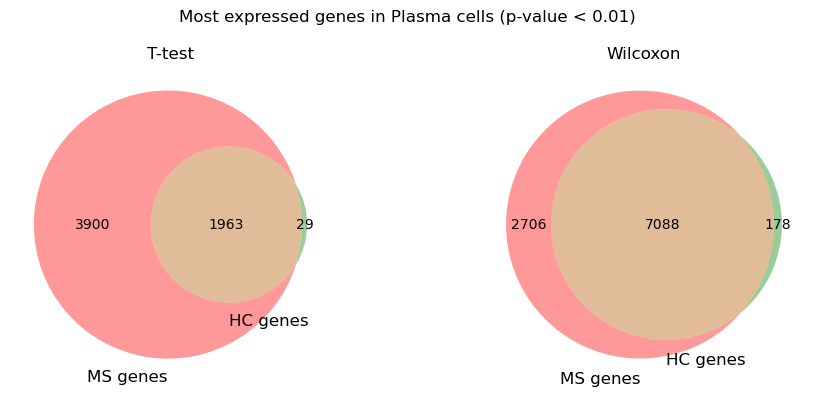

In [39]:
visualize_venn_diagram_ttest_vs_wilcoxon(adata_plasma_cells, cell_type_name='Plasma cells')

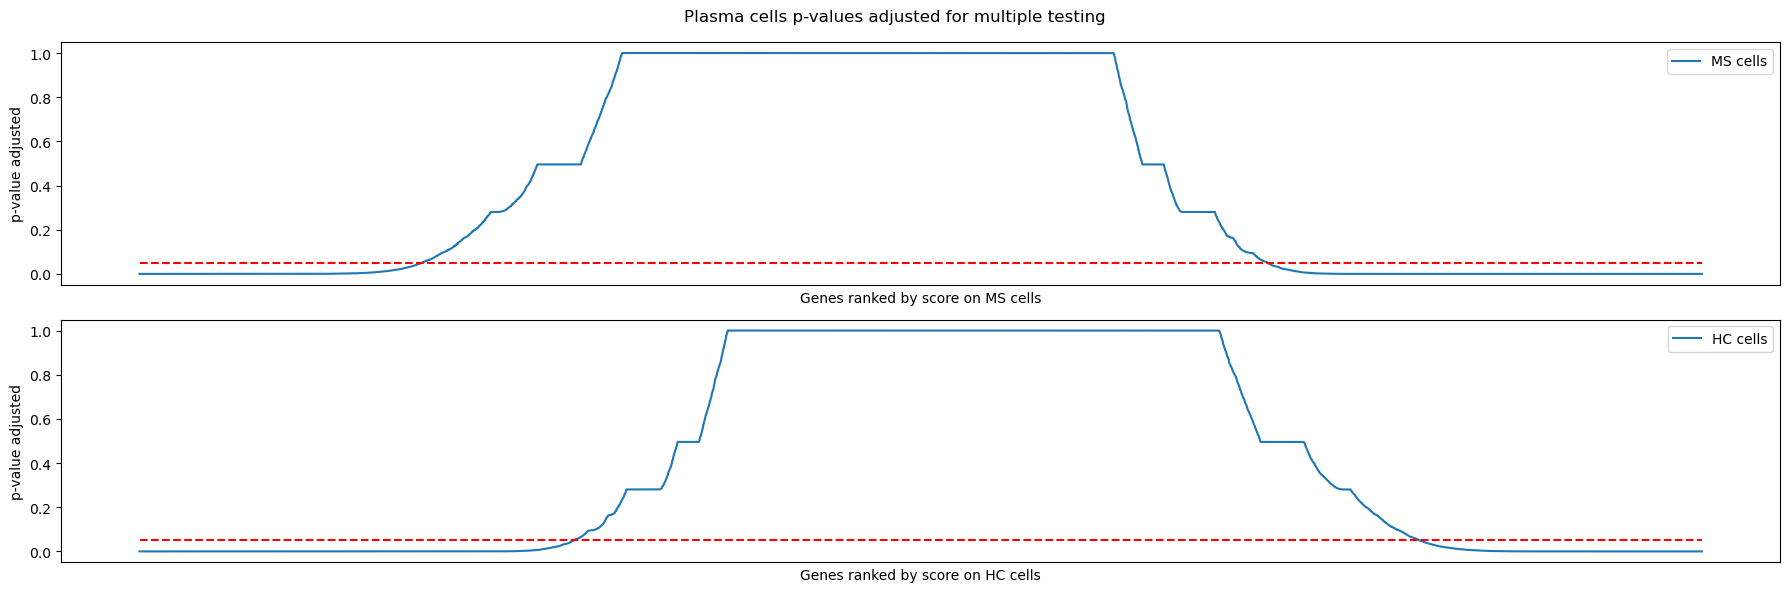

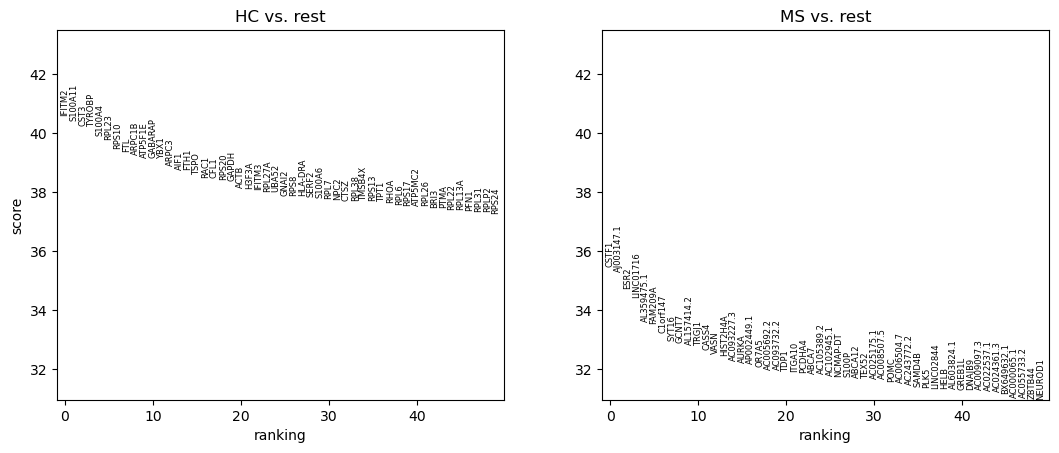

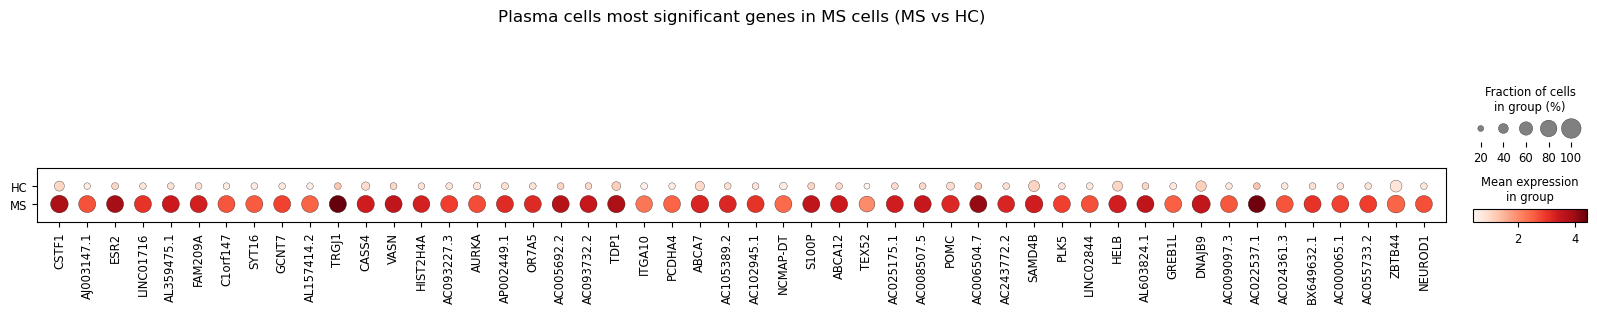

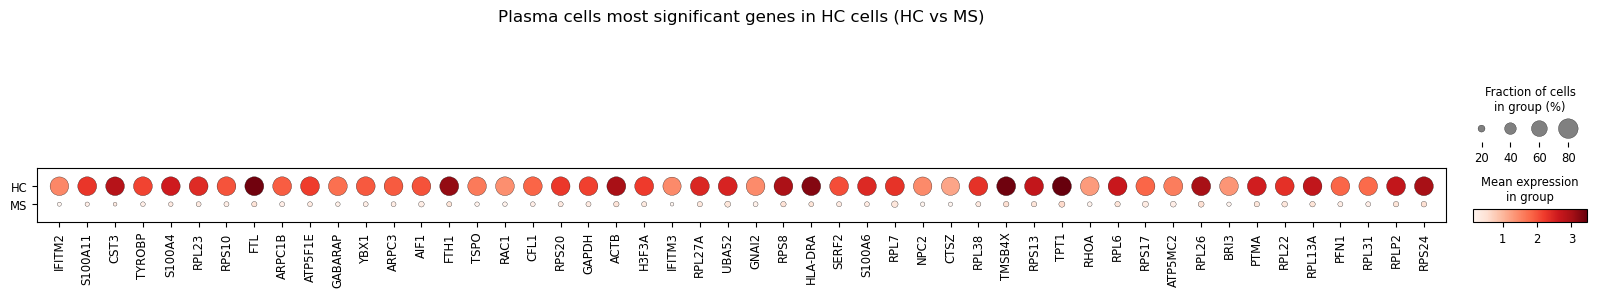

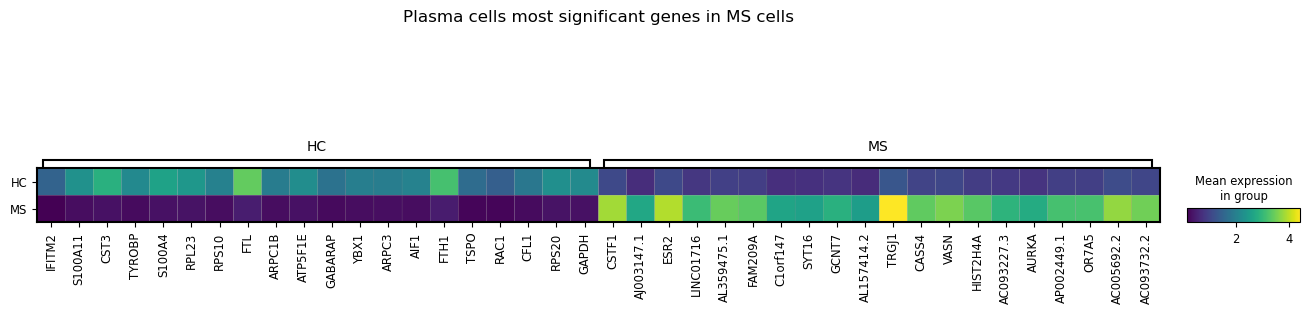

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator



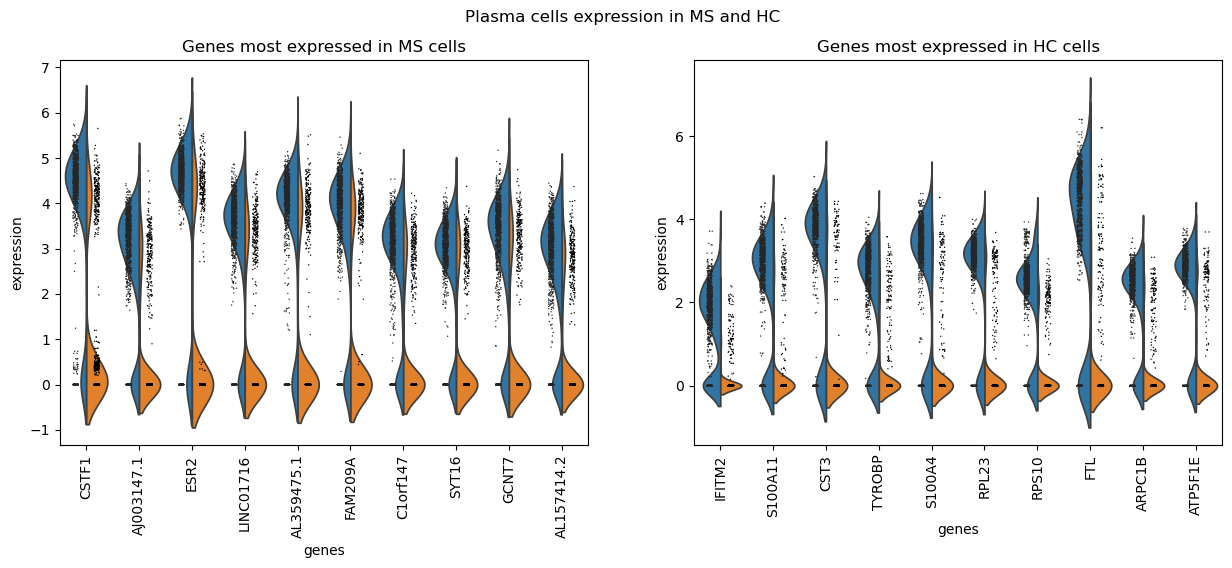

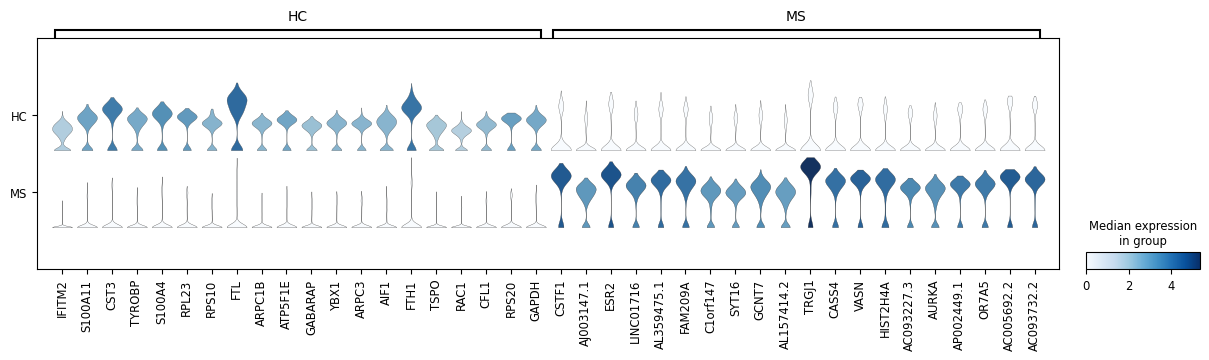

In [40]:
visualize_p_value_adj(adata_plasma_cells, cell_type_name='Plasma cells')
dotplots_and_ranking_most_significant_genes(adata_plasma_cells, cell_type_name='Plasma cells')
visualize_rank_genes_groups_violin(adata_plasma_cells, cell_type_name='Plasma cells')

In [41]:
sc.get.rank_genes_groups_df(adata_plasma_cells, group='HC', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names     scores  logfoldchanges          pvals      pvals_adj
0         IFITM2  40.593884        4.671513  1.871074e-238  5.071145e-235
1        S100A11  40.407303        4.868742  1.089536e-250  4.134136e-246
2           CST3  40.252499        5.442677  1.037837e-249  1.968985e-245
3         TYROBP  40.209625        4.703461  2.346063e-247  1.780380e-243
4         S100A4  39.909019        5.026373  2.321199e-247  1.780380e-243
...          ...        ...             ...            ...            ...
9789    TNKS1BP1   2.877054        4.142798   4.092069e-03   9.919470e-03
9790  AC004812.2   2.876909        2.304612   4.074524e-03   9.878833e-03
9791      ZNF165   2.874518        2.785787   4.112182e-03   9.966316e-03
9792      PPP3R1   2.873769        0.486900   4.101465e-03   9.941611e-03
9793      B3GLCT   2.872254        2.399570   4.122123e-03   9.989772e-03

[9794 rows x 5 columns]

In [42]:
sc.get.rank_genes_groups_df(adata_plasma_cells, group='MS', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names     scores  logfoldchanges          pvals      pvals_adj
0          CSTF1  35.458149        4.541806  2.874840e-214  8.456042e-212
1     AJ003147.1  35.288300        3.835228  2.092500e-212  5.438207e-210
2           ESR2  34.712944        4.698322  2.905434e-207  6.409522e-205
3      LINC01716  34.416855        4.004396  1.899448e-204  3.874874e-202
4     AL359475.1  33.612442        4.234421  6.279716e-197  1.098053e-194
...          ...        ...             ...            ...            ...
5858  AL390730.1   2.880227        1.182701   4.022888e-03   9.760624e-03
5859     GOLGA8K   2.880078        1.855651   4.027478e-03   9.771012e-03
5860       RBM4B   2.878400        0.689611   4.054286e-03   9.831649e-03
5861  AC013553.3   2.877075        2.388566   4.077037e-03   9.884294e-03
5862       ERAP1   2.874037        0.494020   4.104894e-03   9.949287e-03

[5863 rows x 5 columns]

### HSC/MPP

In [43]:
if os.path.exists('write/HSC/MPP.h5ad'):
    adata_HSC_MPP = sc.read('write/HSC_MPP.h5ad')
else:
    adata_HSC_MPP = adata[adata.obs['cell_types_labels']=='HSC/MPP']
    adata_HSC_MPP = compute_rank_genes_group(adata_HSC_MPP)
    adata_HSC_MPP.write('write/HSC_MPP.h5ad')
adata_HSC_MPP

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:640: ImplicitModificationWarning:

Trying to modify attribute `._uns` of view, initializing view as actual.



Computing rank_genes_groups for t-test
Computing rank_genes_groups for wilcoxon


AnnData object with n_obs × n_vars = 121 × 37944
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC'
    var: 'gene_ids', 'feature_types'
    uns: 'log1p', 'rank_genes_groups', 't-test', 'wilcoxon'

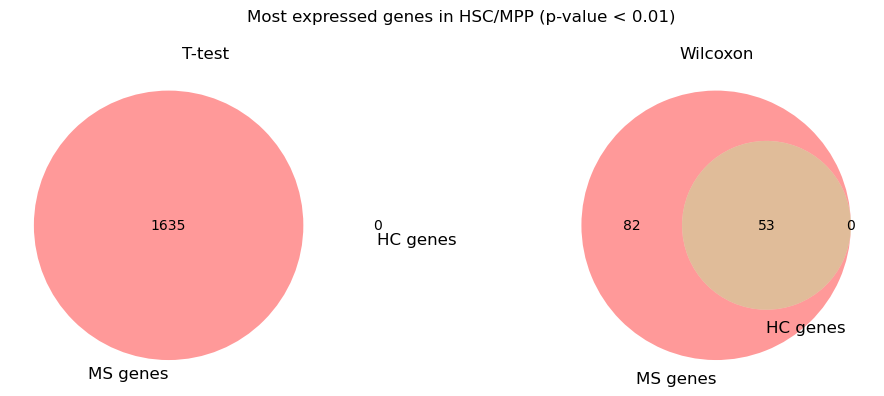

In [44]:
visualize_venn_diagram_ttest_vs_wilcoxon(adata_HSC_MPP, cell_type_name='HSC/MPP')

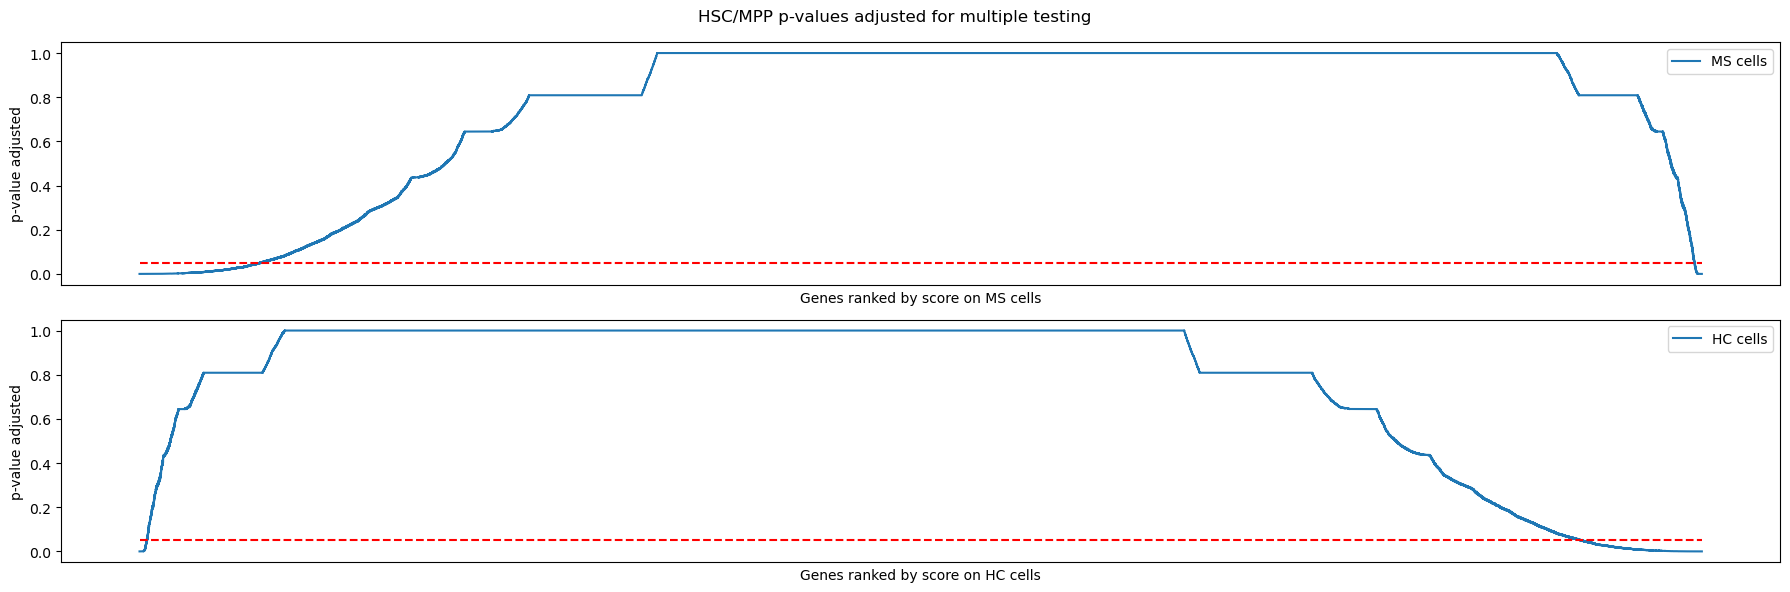

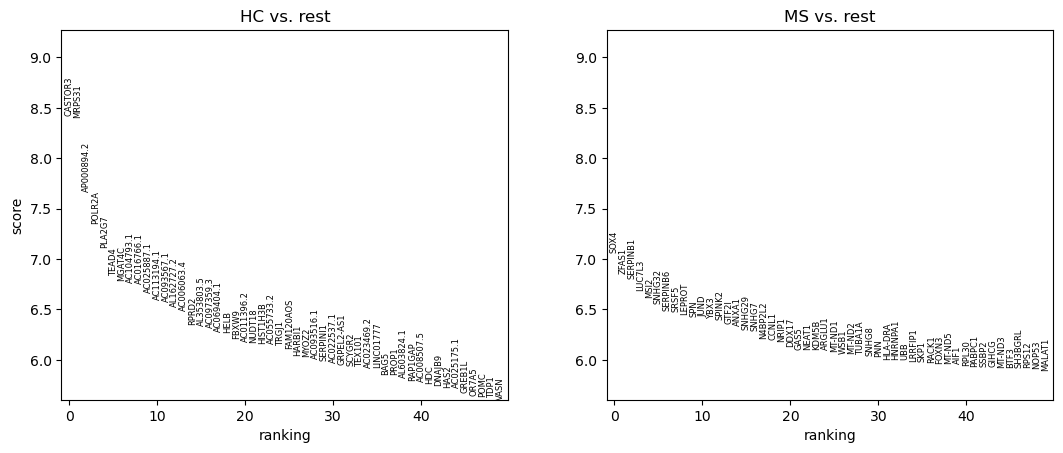

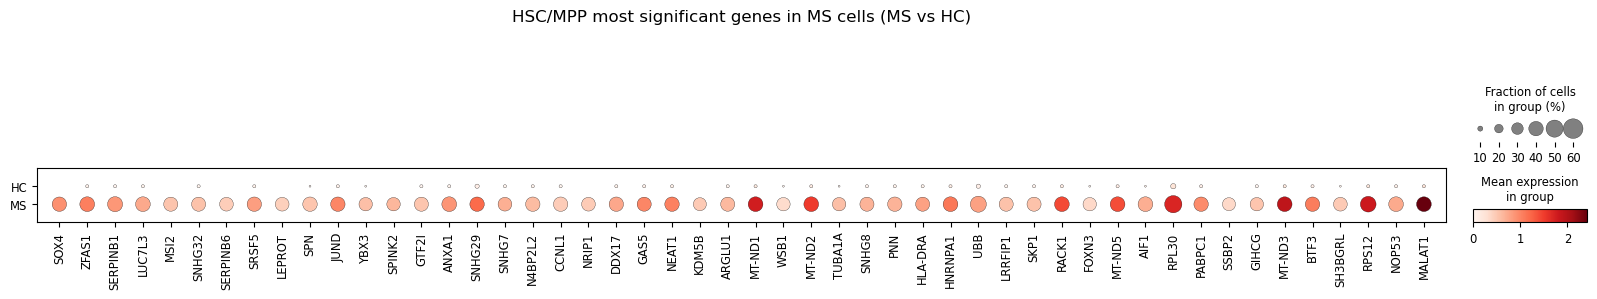

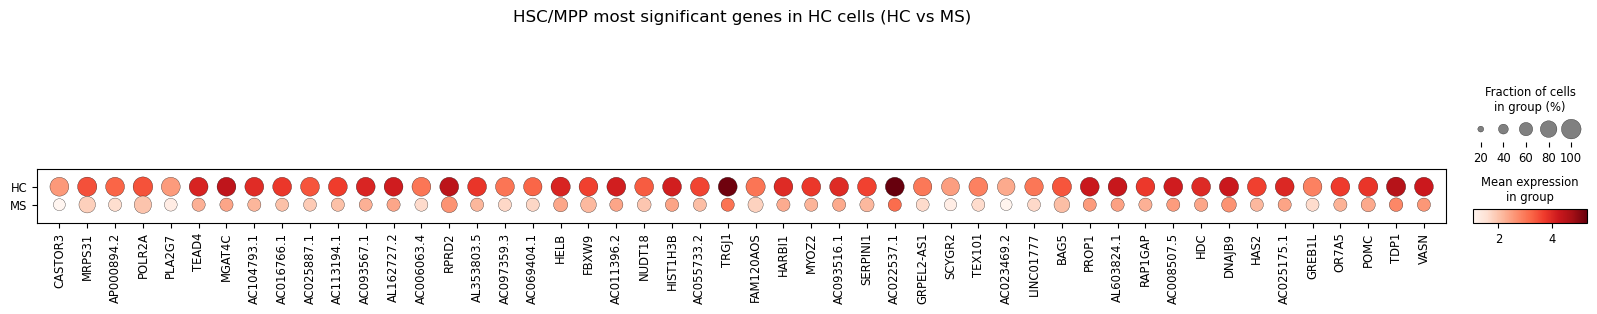

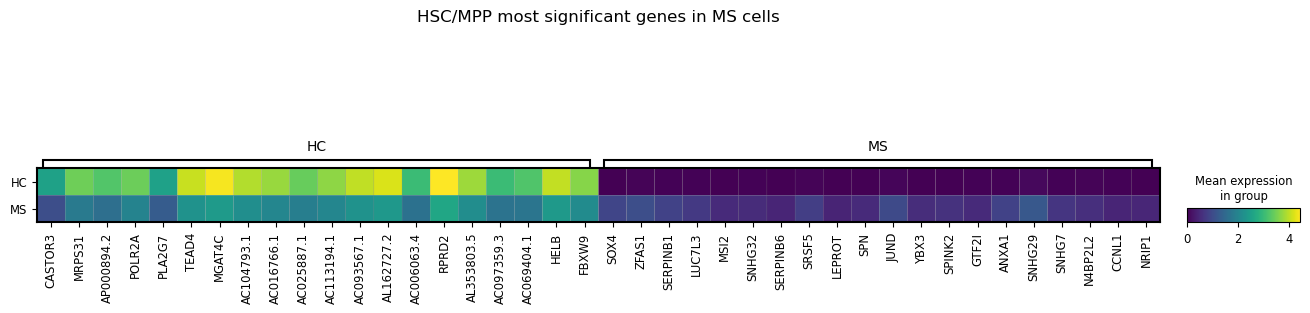

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator



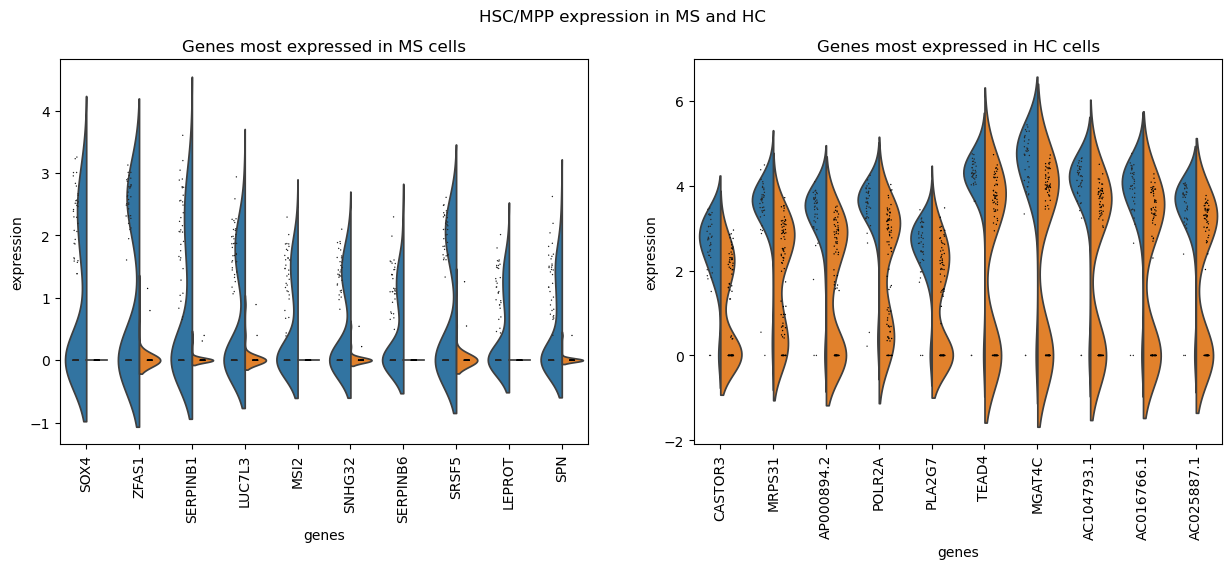

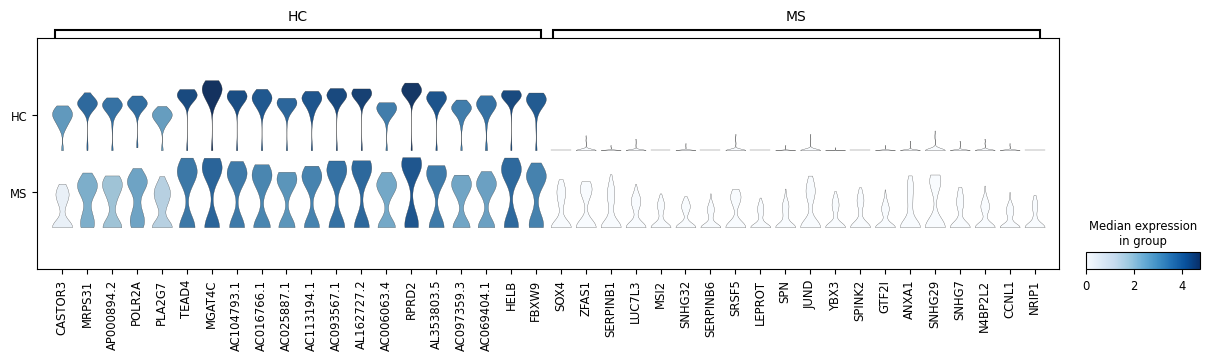

In [45]:
visualize_p_value_adj(adata_HSC_MPP, cell_type_name='HSC/MPP')
dotplots_and_ranking_most_significant_genes(adata_HSC_MPP, cell_type_name='HSC/MPP')
visualize_rank_genes_groups_violin(adata_HSC_MPP, cell_type_name='HSC/MPP')

In [46]:
sc.get.rank_genes_groups_df(adata_HSC_MPP, group='HC', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names    scores  logfoldchanges         pvals     pvals_adj
0       CASTOR3  8.424452        2.670491  3.058564e-13  5.802707e-09
1        MRPS31  8.404848        2.591933  2.439416e-13  5.802707e-09
2    AP000894.2  7.666064        2.612267  8.310734e-12  1.051142e-07
3        POLR2A  7.348547        2.274450  3.605611e-11  3.420282e-07
4        PLA2G7  7.114849        2.180708  1.228445e-10  9.322427e-07
..          ...       ...             ...           ...           ...
130       RNF14  3.730614        1.507139  3.223863e-04  7.546345e-03
131   LINC01179  3.702974        1.417917  3.667405e-04  8.302493e-03
132  AL157414.2  3.641302        1.319309  4.046028e-04  8.956972e-03
133   LINC02416  3.638021        1.277515  4.400811e-04  9.535772e-03
134       CSTF1  3.605719        1.607319  4.572175e-04  9.846005e-03

[135 rows x 5 columns]

In [47]:
sc.get.rank_genes_groups_df(adata_HSC_MPP, group='MS', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names    scores  logfoldchanges         pvals  pvals_adj
0         SOX4  7.060747       30.487703  4.889846e-10   0.000002
1        ZFAS1  6.853155        5.153862  7.984841e-10   0.000003
2     SERPINB1  6.809344        6.221795  1.384547e-09   0.000004
3       LUC7L3  6.689436        4.981608  1.731953e-09   0.000004
4         MSI2  6.618744       29.388859  3.482944e-09   0.000007
...        ...       ...             ...           ...        ...
1630      UBL5  3.619112        2.575679  4.438511e-04   0.009596
1631      GUK1  3.619027        2.567692  4.363099e-04   0.009482
1632   TMEM256  3.616222        2.618869  4.396630e-04   0.009533
1633    STXBP3  3.611567        3.072912  4.590388e-04   0.009880
1634    YTHDC1  3.601295        2.705422  4.632718e-04   0.009948

[1635 rows x 5 columns]

### DC

In [48]:
if os.path.exists('write/DC.h5ad'):
    adata_DC = sc.read('write/DC.h5ad')
else:
    adata_DC = adata[adata.obs['cell_types_labels']=='DC']
    adata_DC = compute_rank_genes_group(adata_DC)
    adata_DC.write('write/DC.h5ad')
adata_DC

AnnData object with n_obs × n_vars = 269 × 37944
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC'
    var: 'gene_ids', 'feature_types'
    uns: 'log1p', 'rank_genes_groups', 't-test', 'wilcoxon'

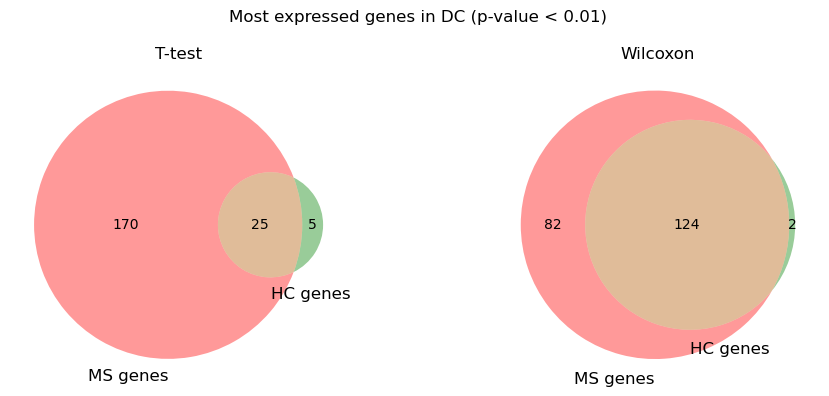

In [49]:
visualize_venn_diagram_ttest_vs_wilcoxon(adata_DC, cell_type_name='DC')

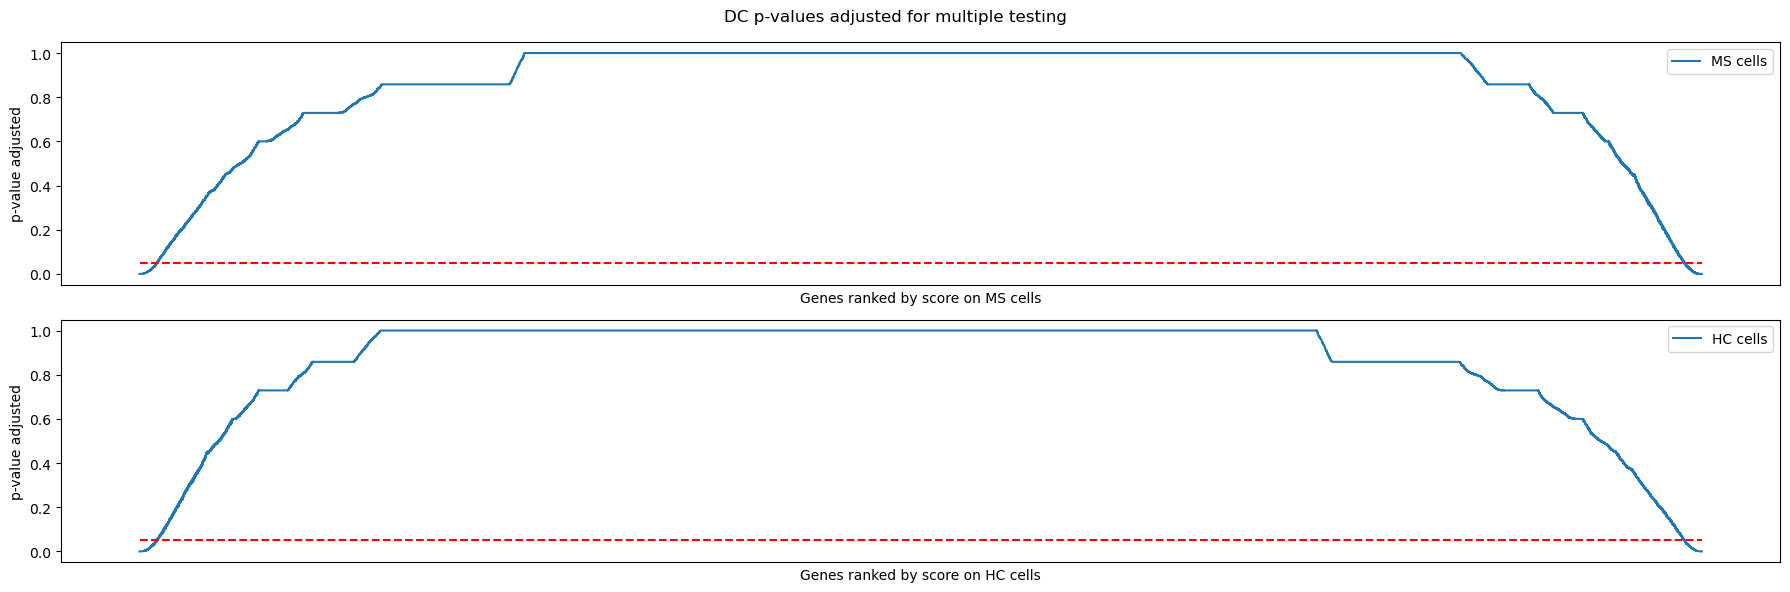

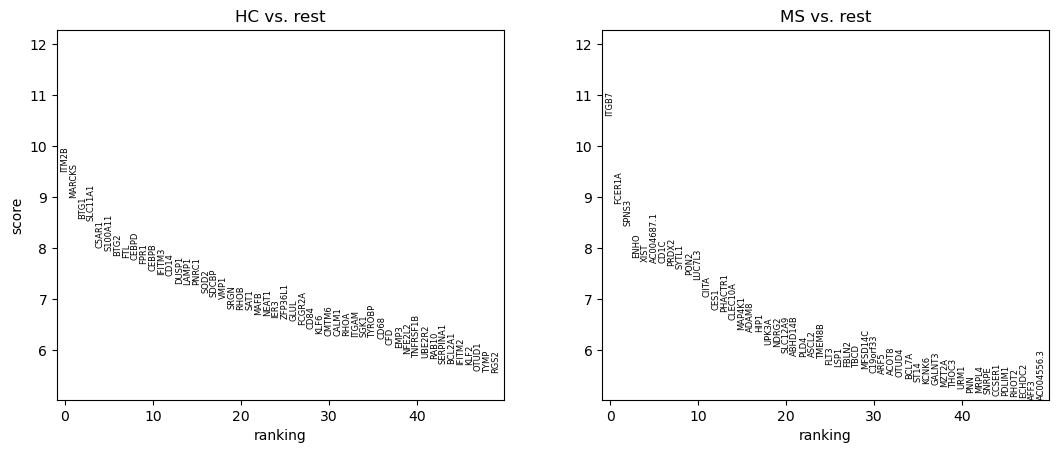

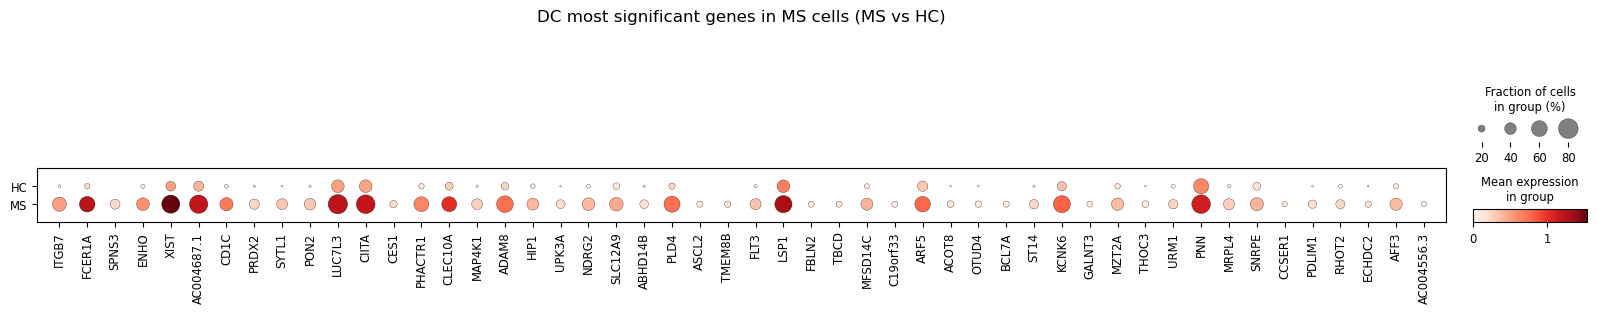

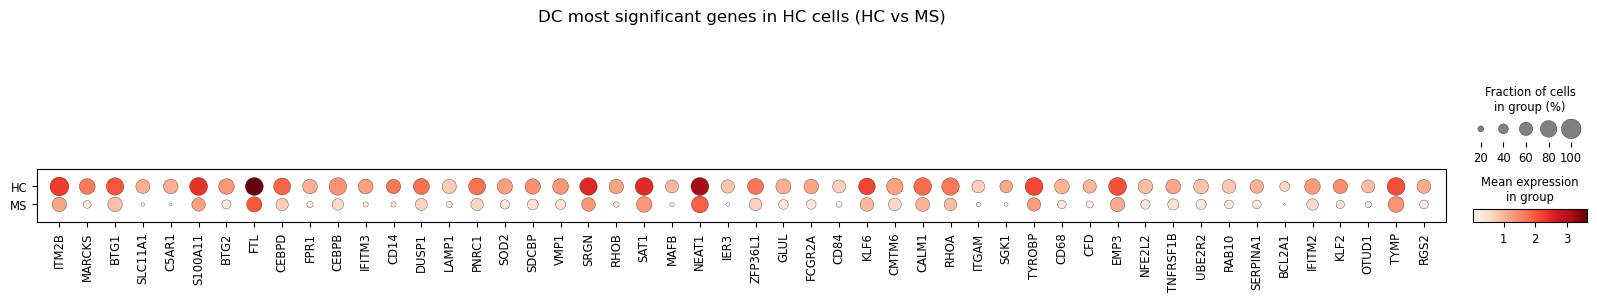

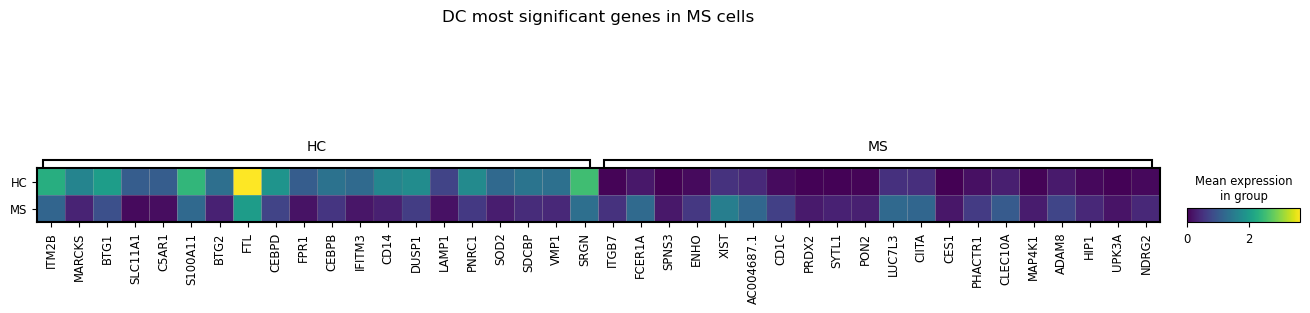

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning:

FixedFormatter should only be used together with FixedLocator



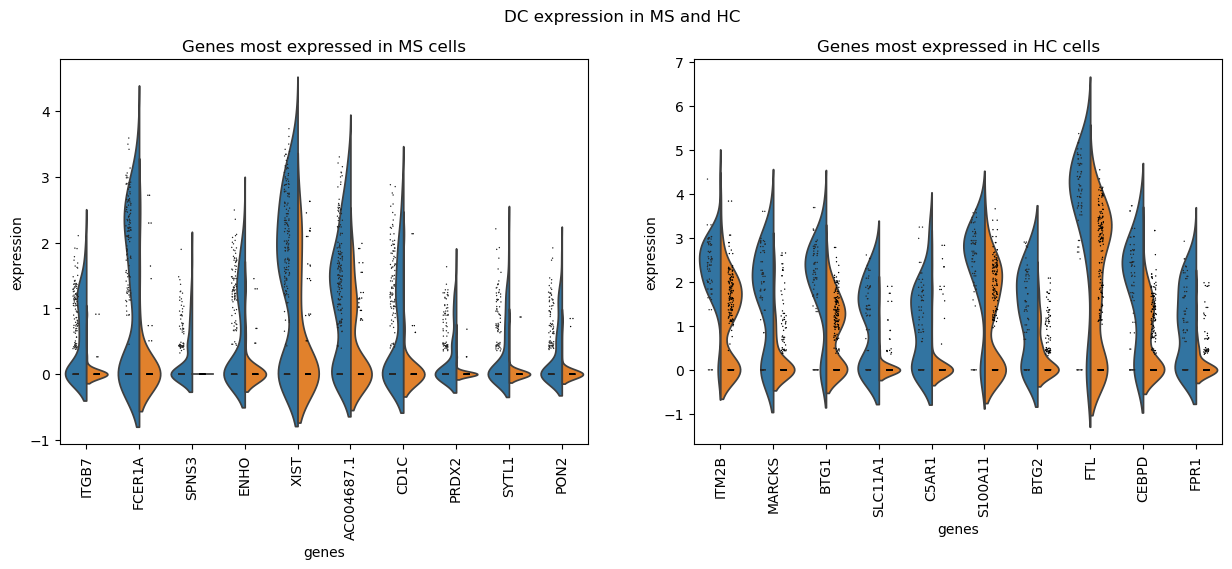

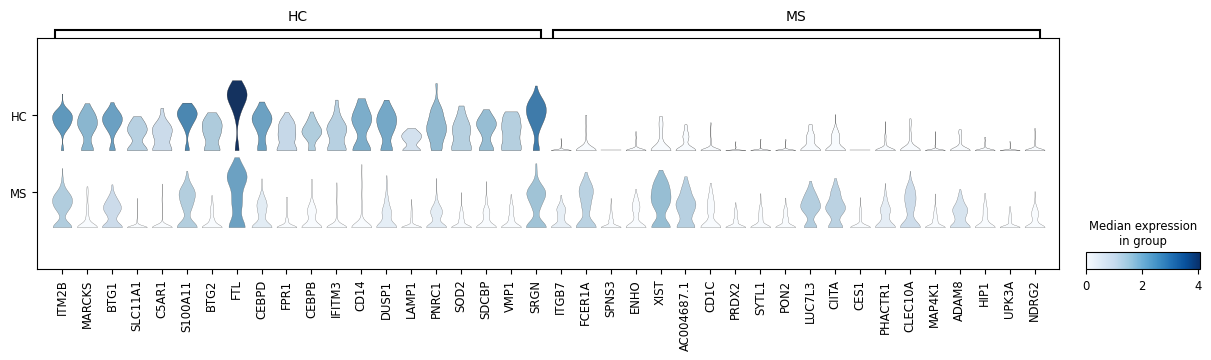

In [50]:
visualize_p_value_adj(adata_DC, cell_type_name='DC')
dotplots_and_ranking_most_significant_genes(adata_DC, cell_type_name='DC')
visualize_rank_genes_groups_violin(adata_DC, cell_type_name='DC')

In [51]:
sc.get.rank_genes_groups_df(adata_DC, group='HC', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names    scores  logfoldchanges         pvals     pvals_adj
0      ITM2B  9.494915        1.975514  1.043358e-16  1.979459e-12
1     MARCKS  8.990686        3.315311  7.033275e-14  5.337412e-10
2       BTG1  8.568511        2.191146  2.169678e-13  1.176090e-09
3    SLC11A1  8.531703        4.233223  1.527665e-12  3.864381e-09
4      C5AR1  8.005194        3.827662  8.074544e-12  1.802238e-08
..       ...       ...             ...           ...           ...
201     GBP2  4.105825        2.179549  1.012683e-04  9.678902e-03
202    SEL1L  4.100507        1.465538  8.928069e-05  8.799134e-03
203    ARL8B  4.099719        1.661515  9.640554e-05  9.355529e-03
204     OAZ1  4.086198        0.996424  7.675336e-05  7.807854e-03
205     EIF1  4.029067        1.044901  1.025990e-04  9.756936e-03

[206 rows x 5 columns]

In [52]:
sc.get.rank_genes_groups_df(adata_DC, group='MS', key='t-test', pval_cutoff=0.01, log2fc_min=0)

names     scores  logfoldchanges         pvals     pvals_adj
0        ITGB7  10.600167        4.242379  4.405100e-22  1.671471e-17
1       FCER1A   8.862171        3.230909  4.020649e-16  5.085316e-12
2        SPNS3   8.440434       27.945658  6.215279e-15  5.895814e-11
3         ENHO   7.810315        3.017441  1.524896e-13  9.643439e-10
4         XIST   7.738711        2.431243  1.360716e-12  3.687928e-09
..         ...        ...             ...           ...           ...
190  MAP3K2-DT   3.967937       25.417452  1.008417e-04  9.662472e-03
191   ANKRD36C   3.955216        2.398608  9.820397e-05  9.457491e-03
192      SENP1   3.949842        3.701282  1.021303e-04  9.736761e-03
193      FBXW2   3.947019        1.963405  1.033174e-04  9.800689e-03
194       UCK2   3.946993        2.943992  1.038017e-04  9.822075e-03

[195 rows x 5 columns]